In [1]:

# Import Seaborn for the graphing
import seaborn as sns
import matplotlib.pyplot as plt

# Data management
import pandas as pd

print('Imports complete.')

Imports complete.


In [2]:
## load dataset as Pandas Dataframe
data_dir = "MachineLearning/Dataset.csv"
# Load the training data
df = pd.read_csv(data_dir)
print("##### CSV Loaded #####")
df.head()

##### CSV Loaded #####


Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0            0                   4                 5                5.5   
1            0                   4                 5                5.5   
2            0                   4                 5                5.5   
3            0                   4                12                5.5   
4            0                   4                 6                5.5   

   longdomaintokenlen  avgpathtokenlen  tld  charcompvowels  charcompace  \
0                  14         4.400000    4               8            3   
1                  14         6.000000    4              12            4   
2                  14         5.800000    4              12            5   
3                  14         5.500000    4              32           16   
4                  14         7.333334    4              18           11   

   ldl_url  ...  SymbolCount_FileName  SymbolCount_Extension  \
0        0  ...                     1                      0   
1        0  ...                     0                      0   
2        0  ...                     0                      0   
3        0  ...                     0                      0   
4        0  ...                     0                      0   

   SymbolCount_Afterpath  Entropy_URL  Entropy_Domain  Entropy_DirectoryName  \
0                     -1     0.726298        0.784493               0.894886   
1                     -1     0.688635        0.784493               0.814725   
2                     -1     0.695049        0.784493               0.814725   
3                     -1     0.640130        0.784493               0.814725   
4                     -1     0.681307        0.784493               0.814725   

   Entropy_Filename  Entropy_Extension  Entropy_Afterpath  URL_Type_obf_Type  
0          0.850608                NaN               -1.0         Defacement  
1          0.859793                0.0               -1.0         Defacement  
2          0.801880                0.0               -1.0         Defacement  
3          0.663210                0.0               -1.0         Defacement  
4          0.804526                0.0               -1.0         Defacement  

[5 rows x 80 columns]

In [3]:

# Removes all rows if they contain NaN values
df.dropna(axis='index', inplace=True)


In [4]:
dep_var = 'URL_Type_obf_Type'
df[dep_var].value_counts()


spam          5342
malware       4440
phishing      4014
benign        2709
Defacement    2477
Name: URL_Type_obf_Type, dtype: int64

In [5]:
df[dep_var].unique()


array(['Defacement', 'benign', 'malware', 'phishing', 'spam'],
      dtype=object)

In [6]:
features = df.columns[:-1]
print(features)
print('Number of features: {}'.format(len(features)))



Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

Querylength


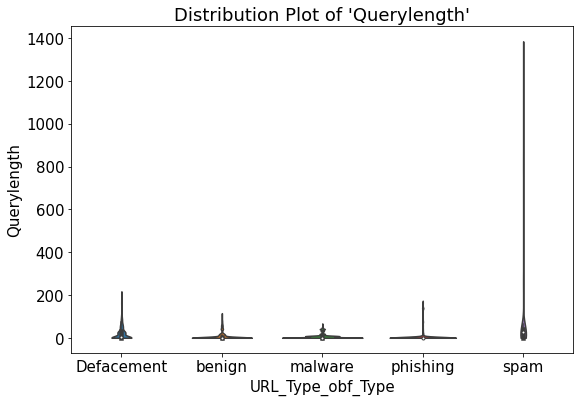

domain_token_count


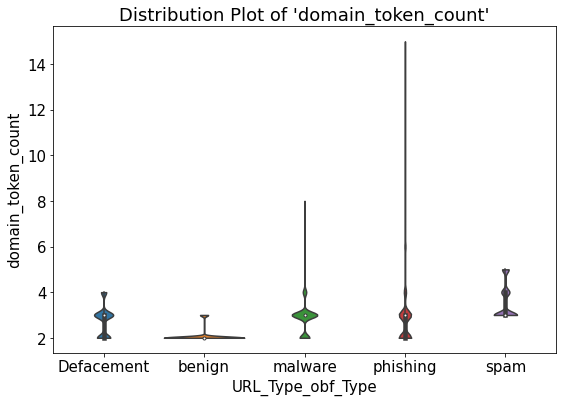

path_token_count


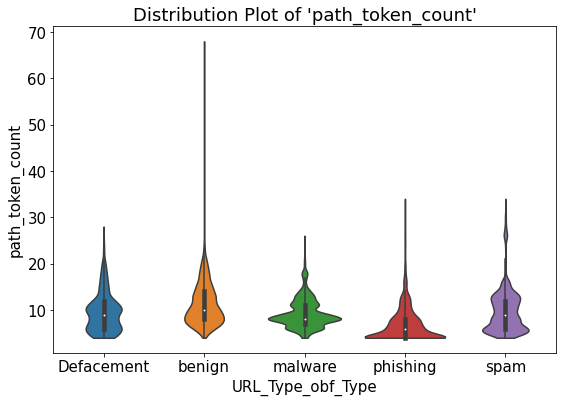

avgdomaintokenlen


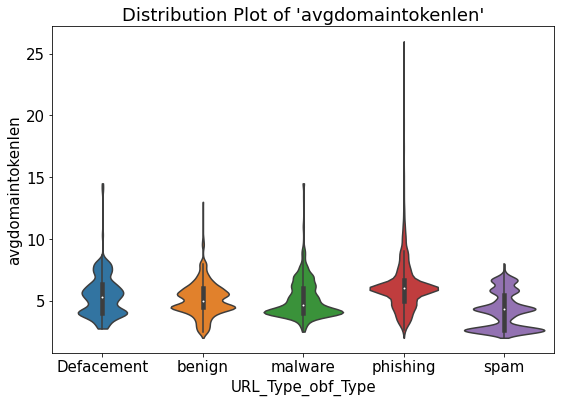

longdomaintokenlen


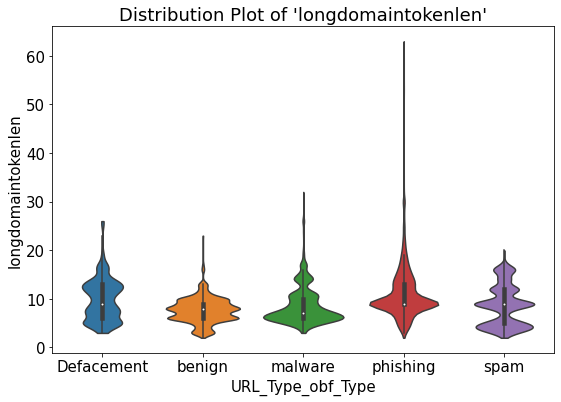

avgpathtokenlen


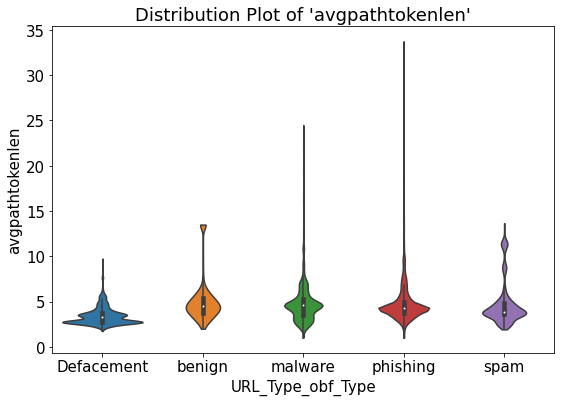

tld


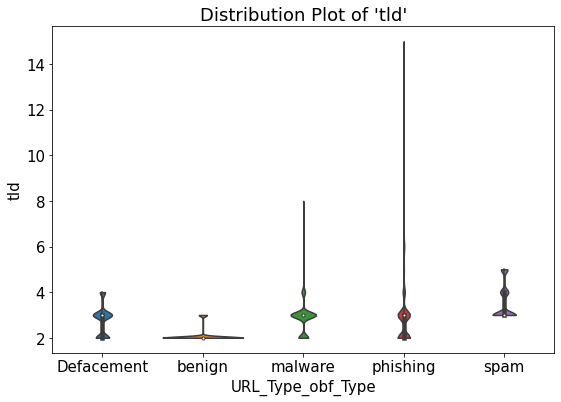

charcompvowels


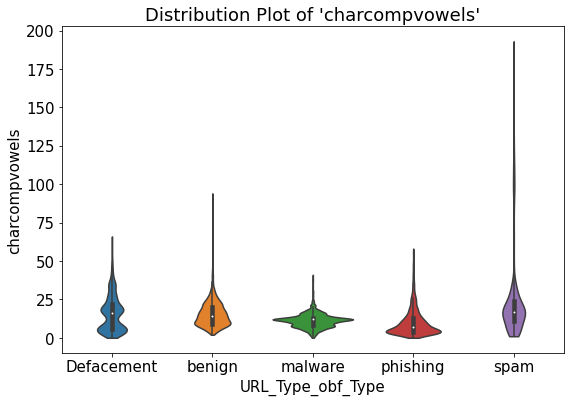

charcompace


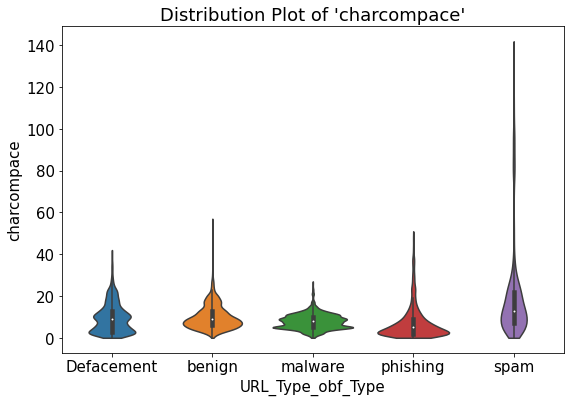

ldl_url


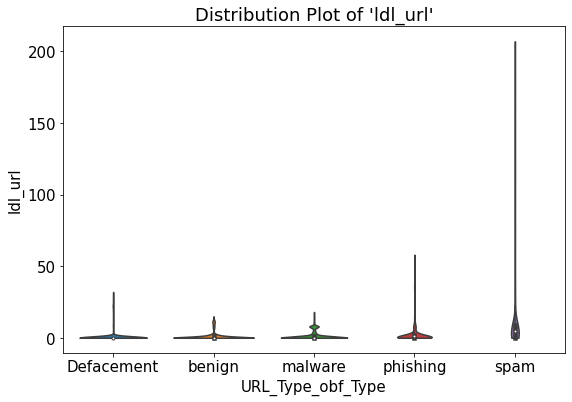

ldl_domain


ldl_path


ldl_filename


ldl_getArg


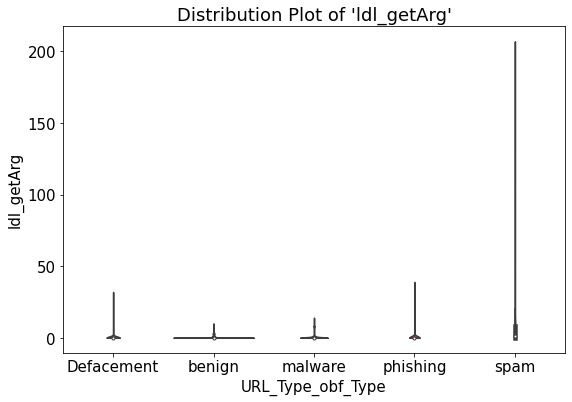

dld_url


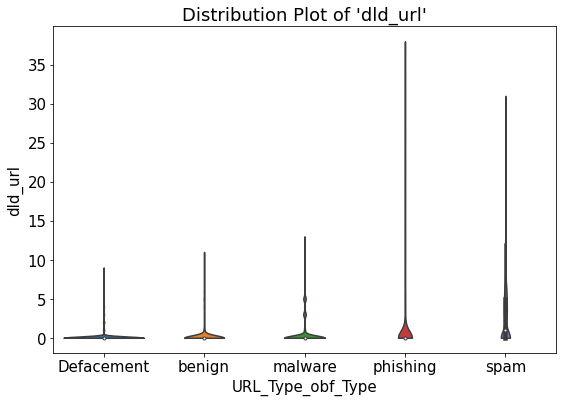

dld_domain


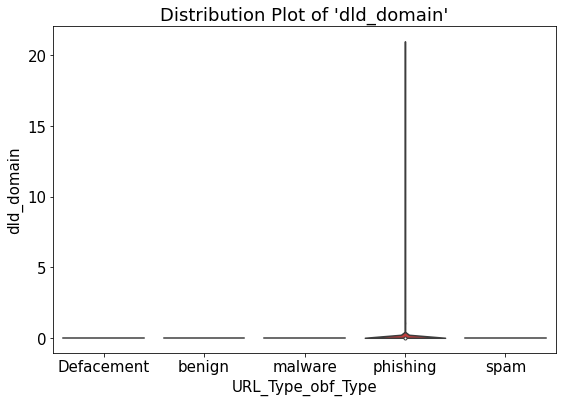

dld_path


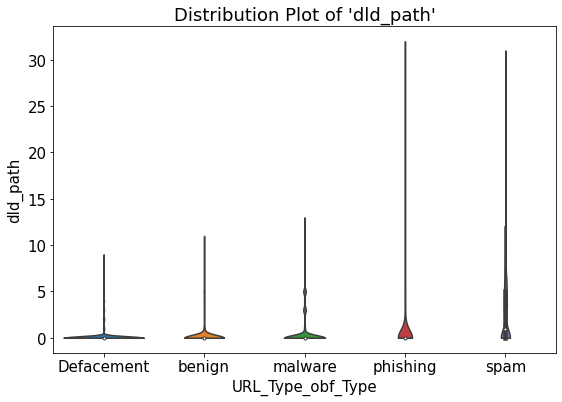

dld_filename


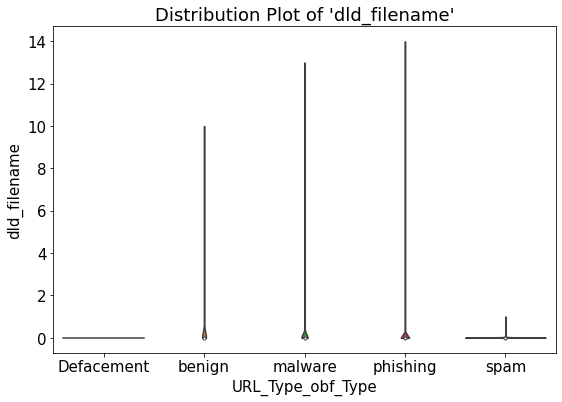

dld_getArg


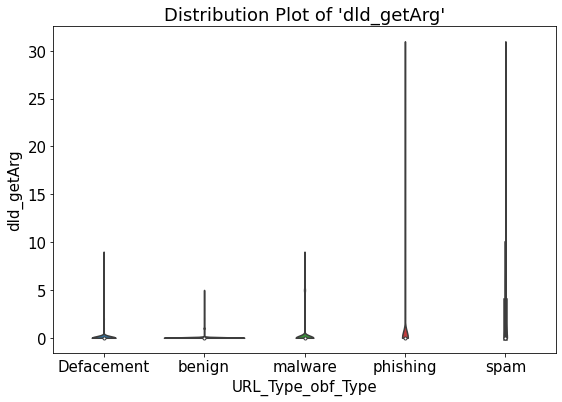

urlLen


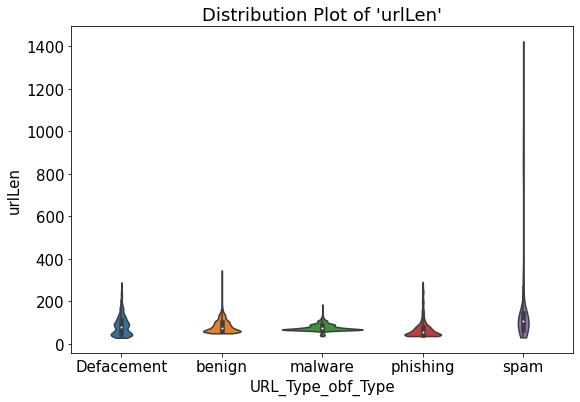

domainlength


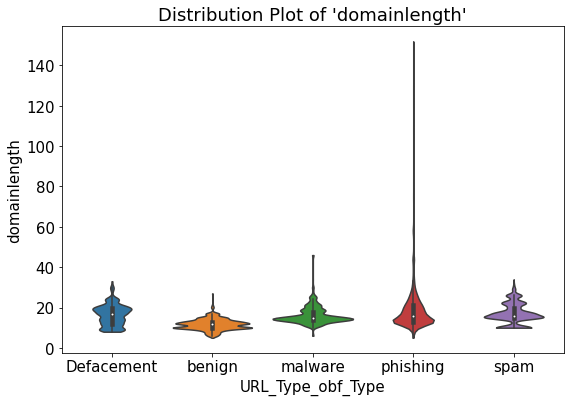

pathLength


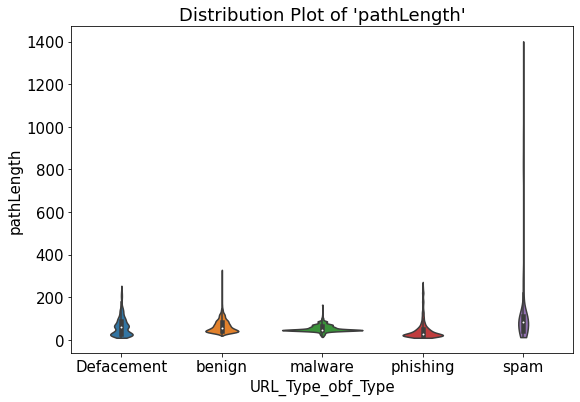

subDirLen


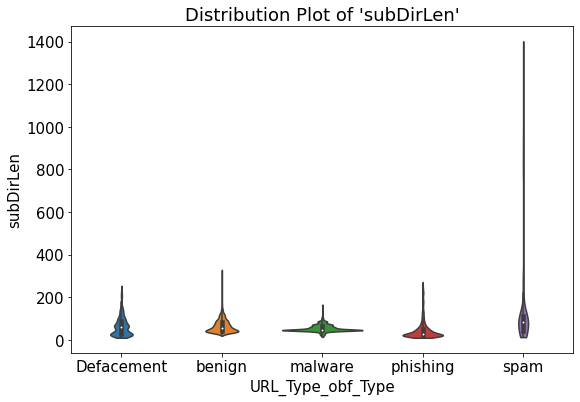

fileNameLen


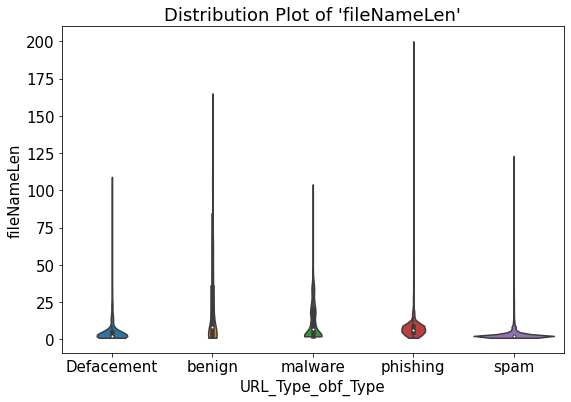

this.fileExtLen


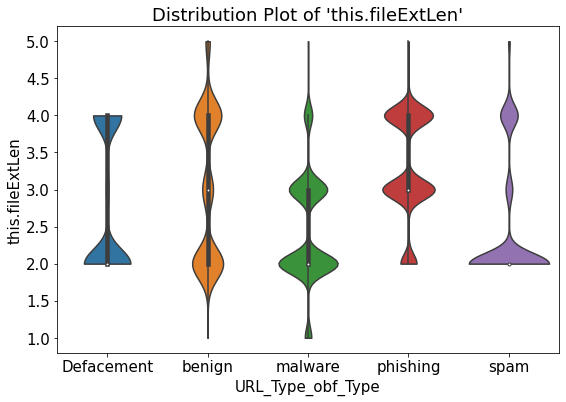

ArgLen


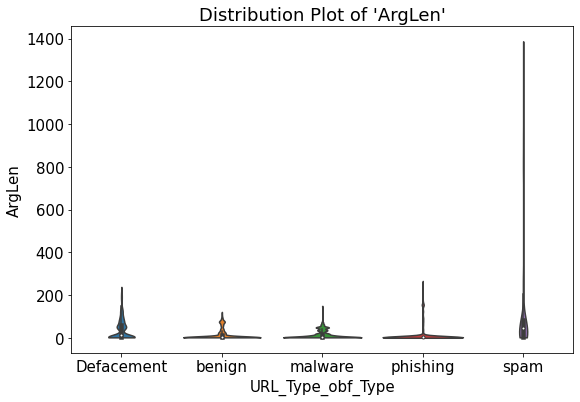

pathurlRatio


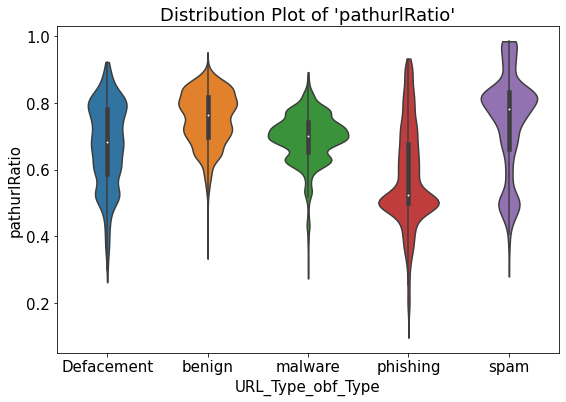

ArgUrlRatio


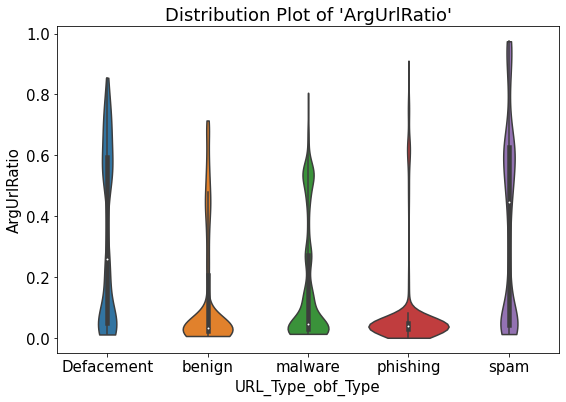

argDomanRatio


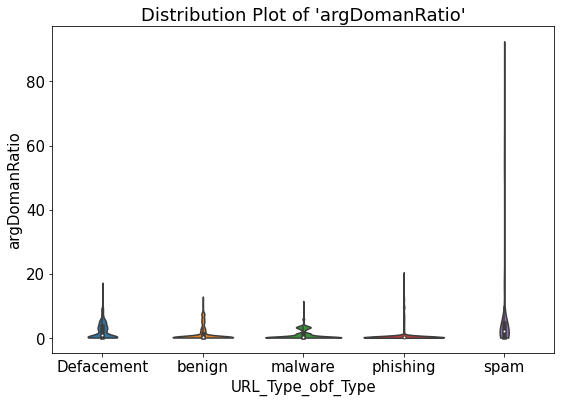

domainUrlRatio


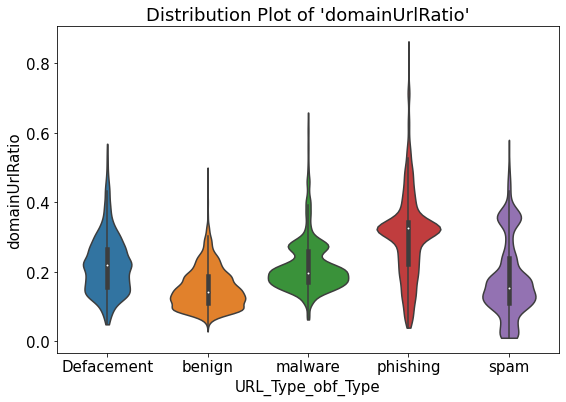

pathDomainRatio


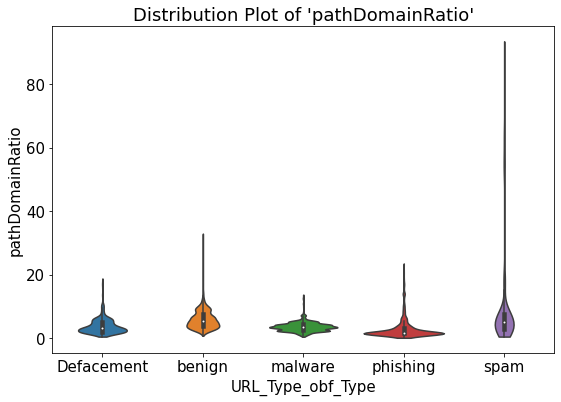

argPathRatio


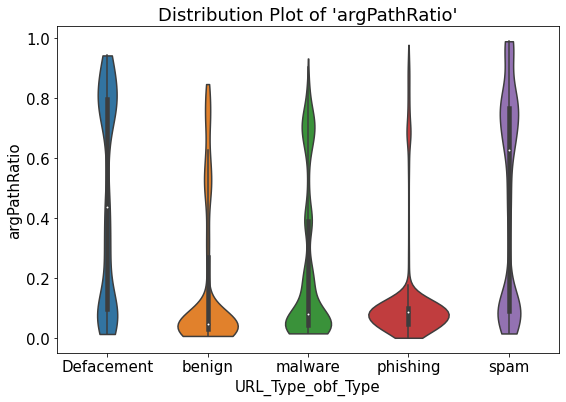

executable


isPortEighty


NumberofDotsinURL


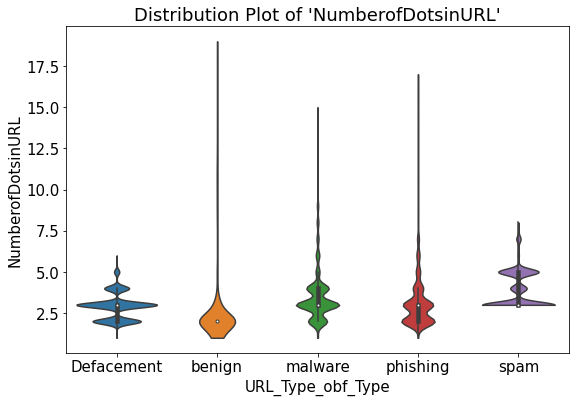

ISIpAddressInDomainName


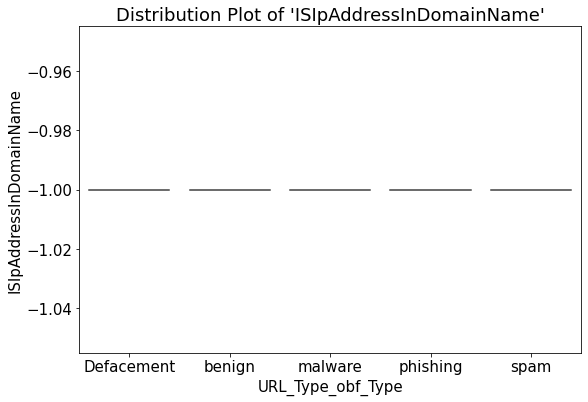

CharacterContinuityRate


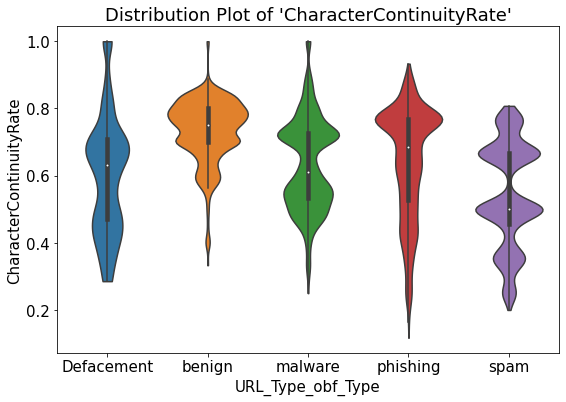

LongestVariableValue


URL_DigitCount


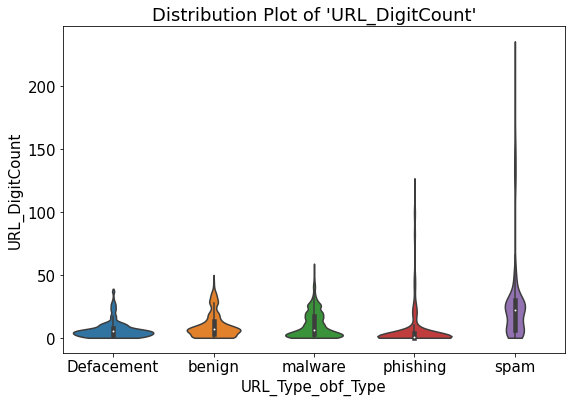

host_DigitCount


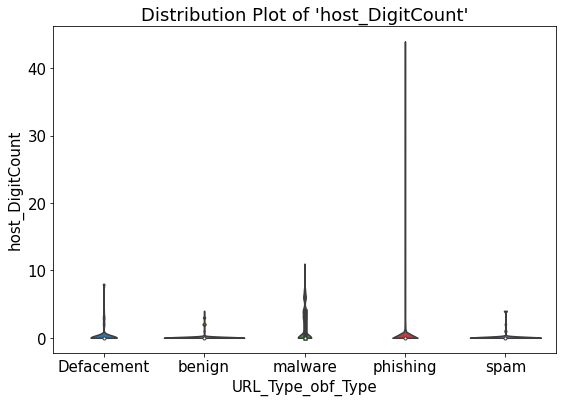

Directory_DigitCount


File_name_DigitCount


Extension_DigitCount


Query_DigitCount


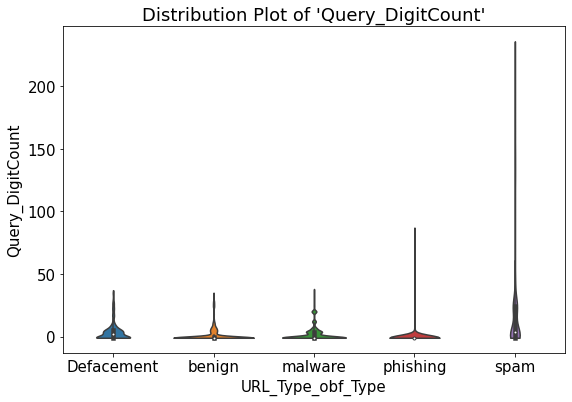

URL_Letter_Count


host_letter_count


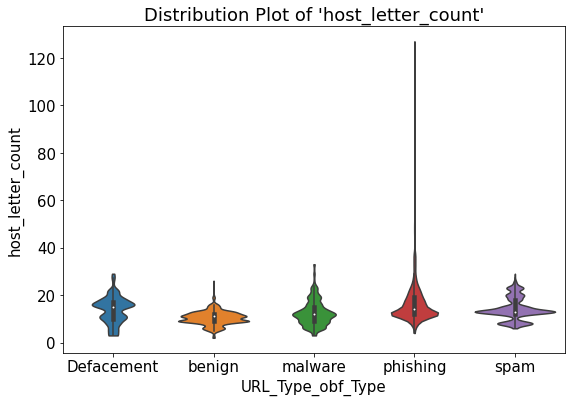

Directory_LetterCount


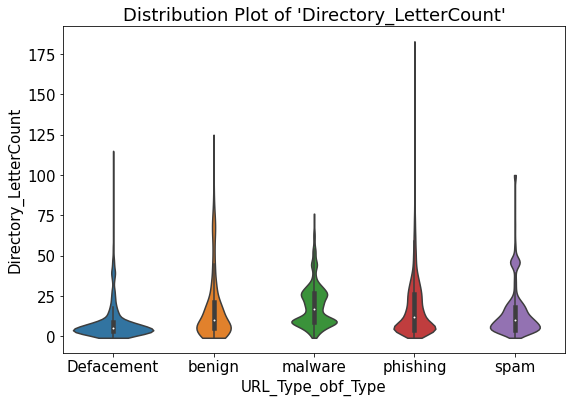

Filename_LetterCount


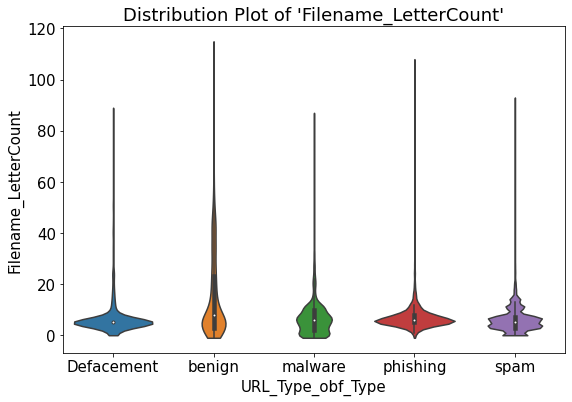

Extension_LetterCount


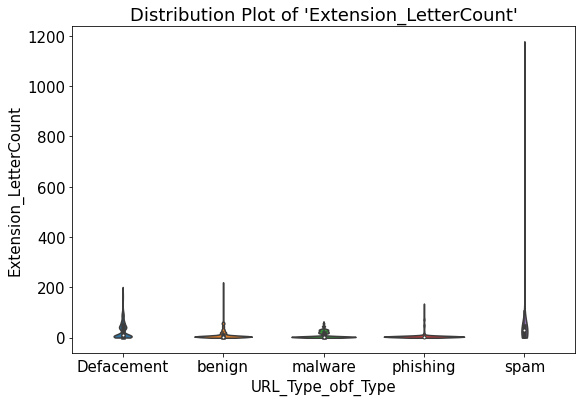

Query_LetterCount


LongestPathTokenLength


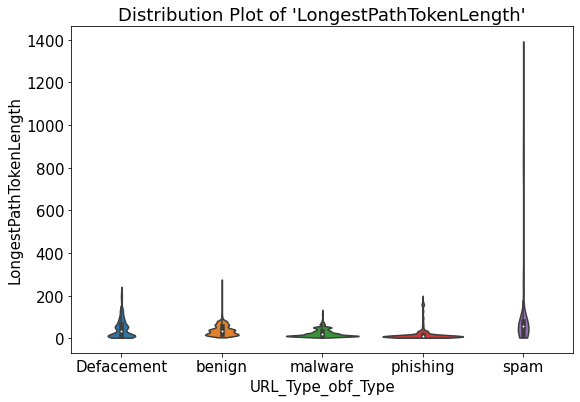

Domain_LongestWordLength


Path_LongestWordLength


sub-Directory_LongestWordLength


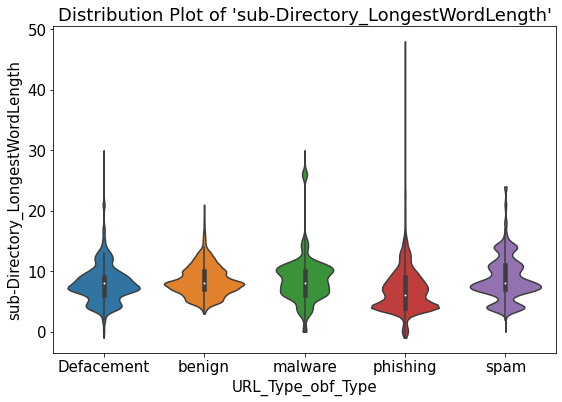

Arguments_LongestWordLength


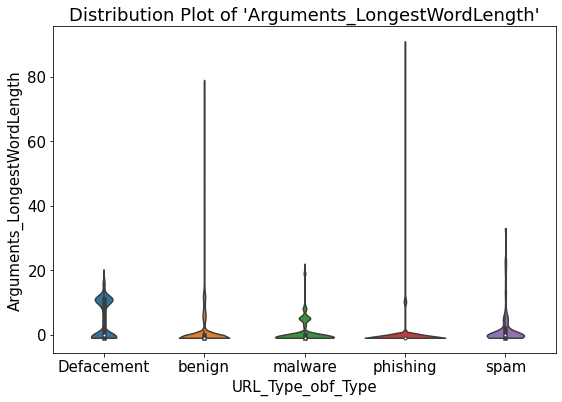

URL_sensitiveWord


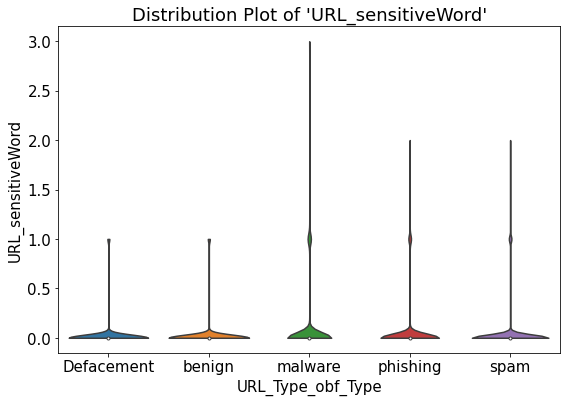

URLQueries_variable


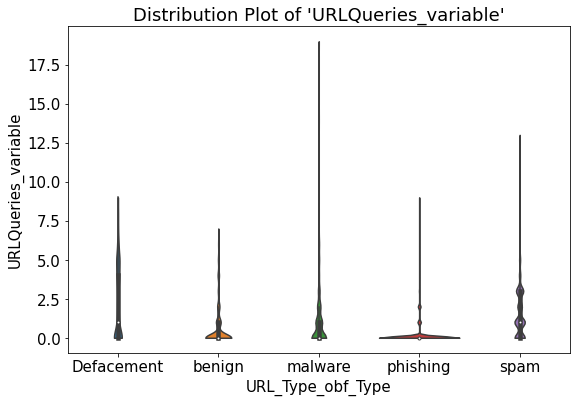

spcharUrl


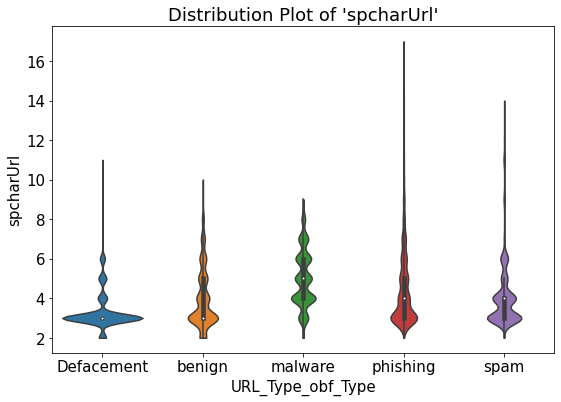

delimeter_Domain


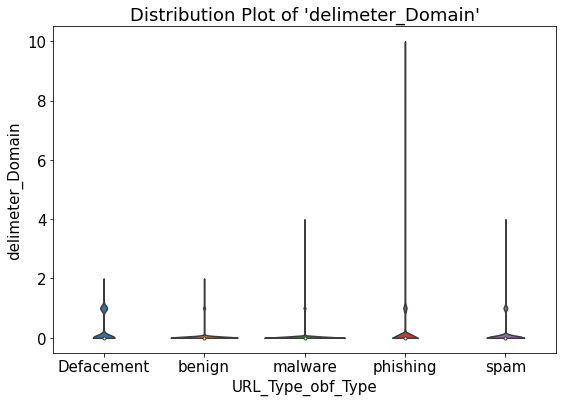

delimeter_path


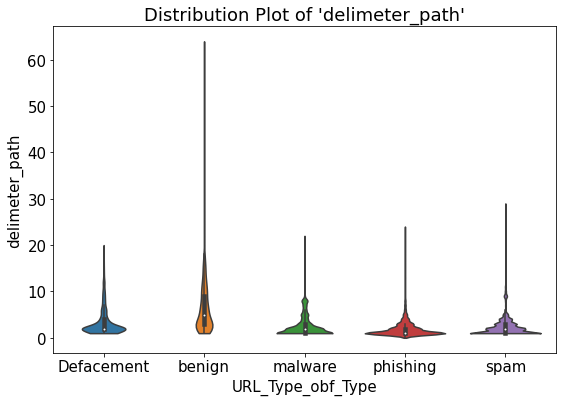

delimeter_Count


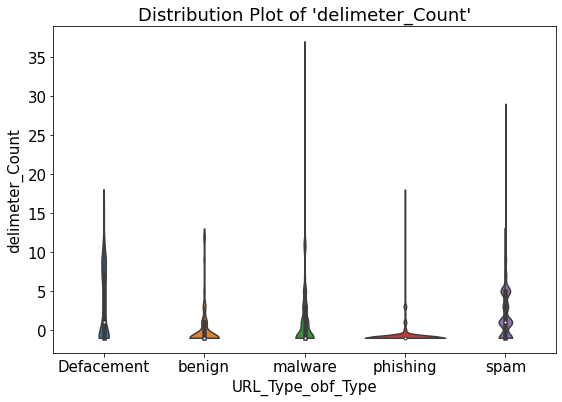

NumberRate_URL


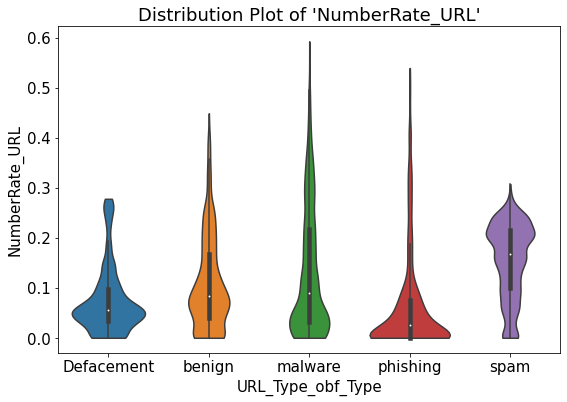

NumberRate_Domain


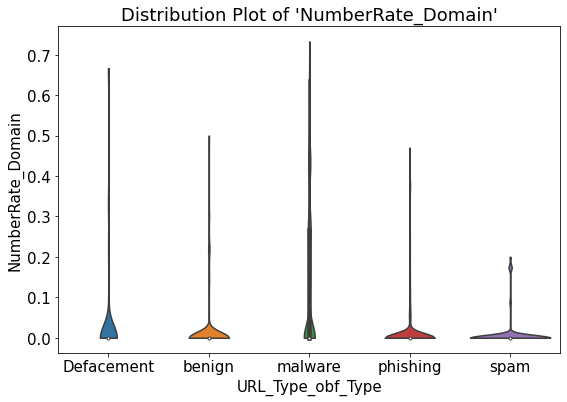

NumberRate_DirectoryName


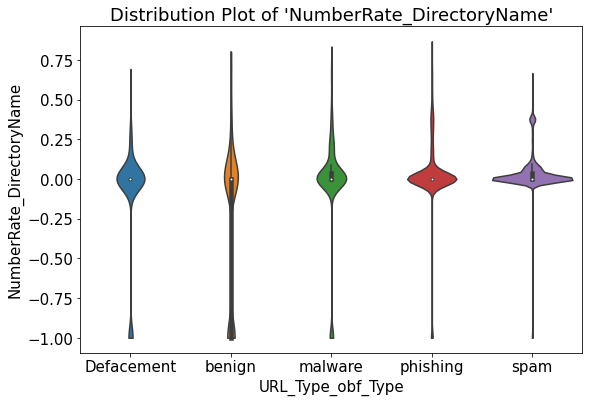

NumberRate_FileName


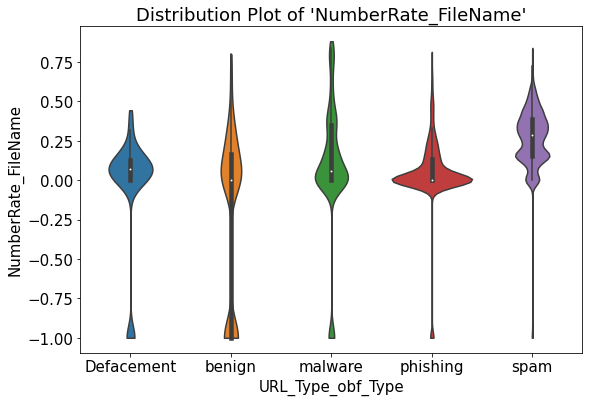

NumberRate_Extension


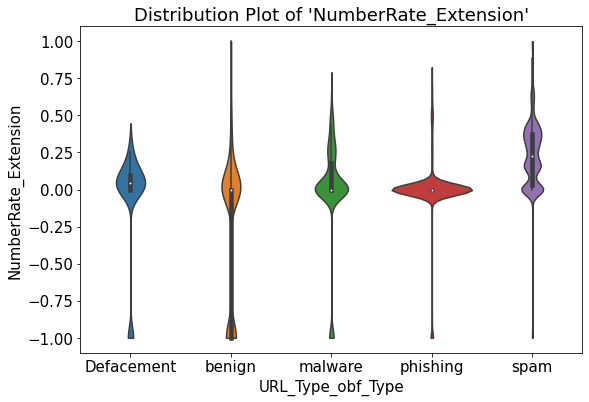

NumberRate_AfterPath


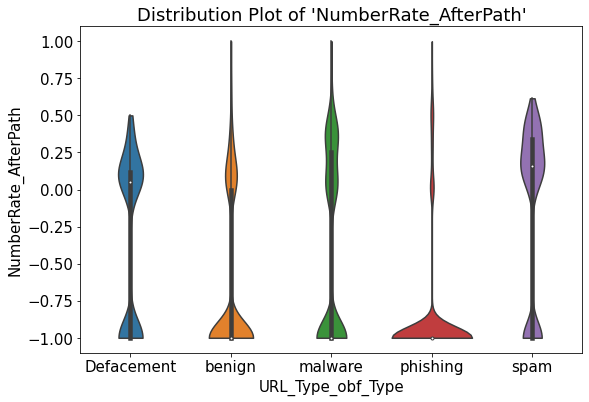

SymbolCount_URL


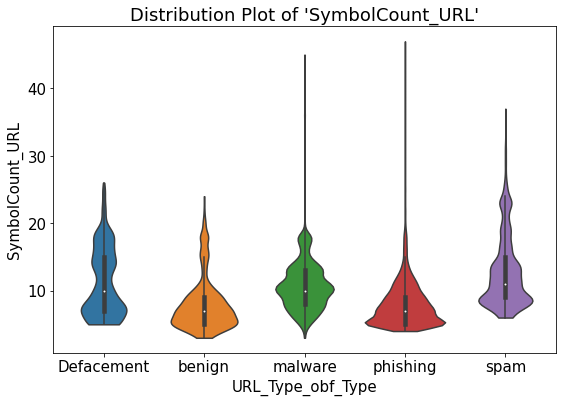

SymbolCount_Domain


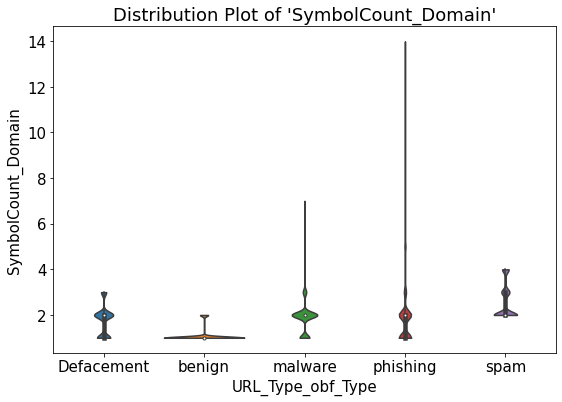

SymbolCount_Directoryname


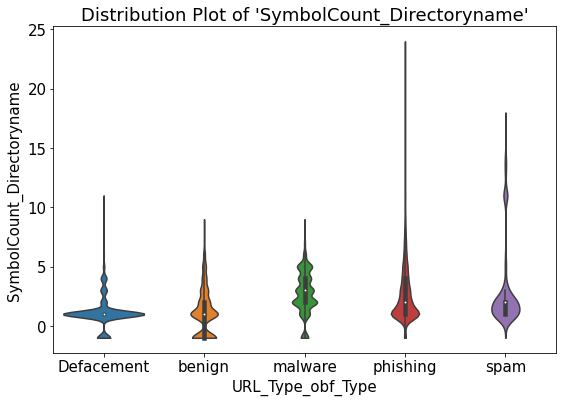

SymbolCount_FileName


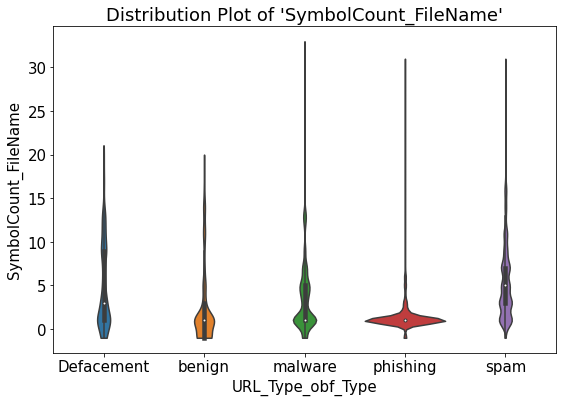

SymbolCount_Extension


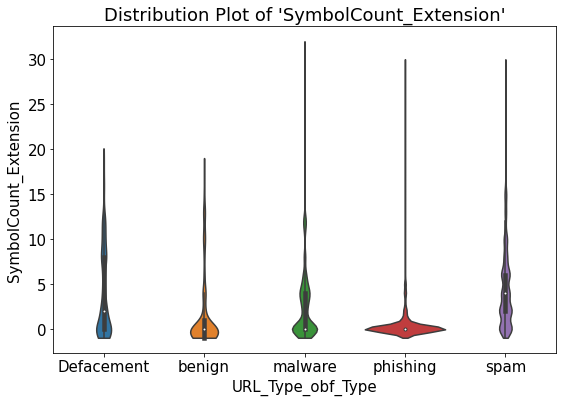

SymbolCount_Afterpath


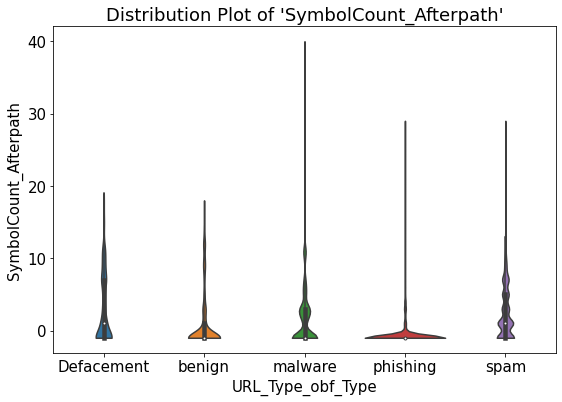

Entropy_URL


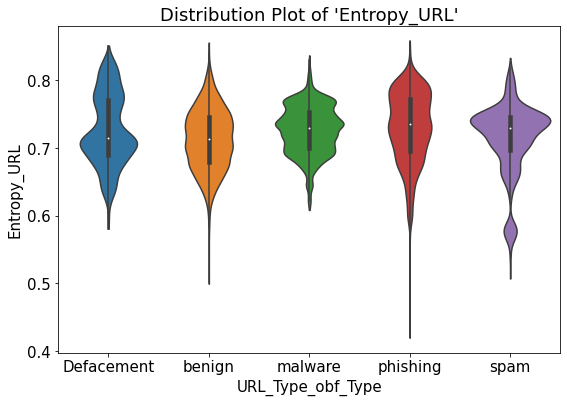

Entropy_Domain


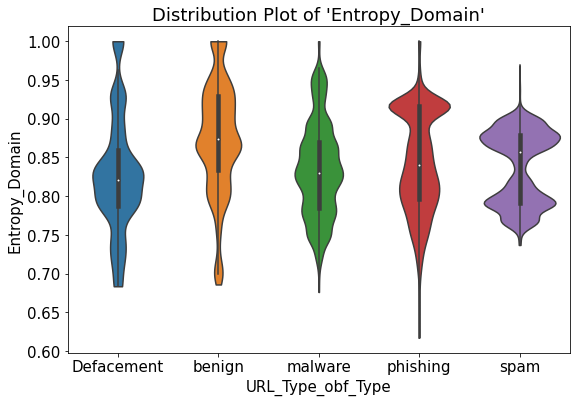

Entropy_DirectoryName


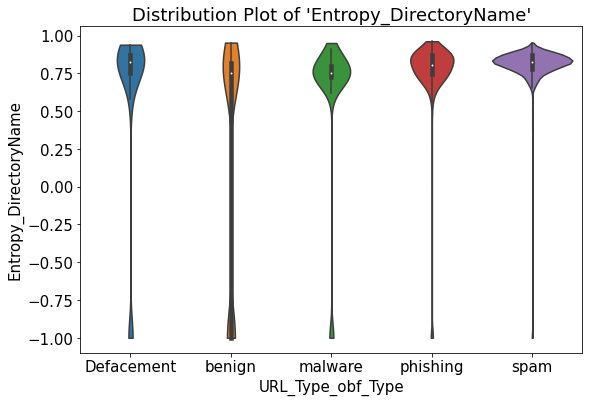

Entropy_Filename


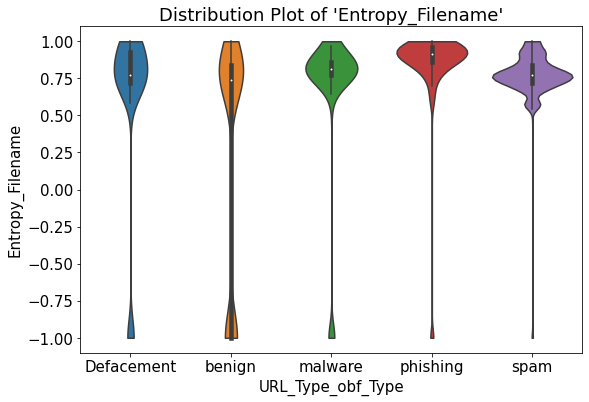

Entropy_Extension


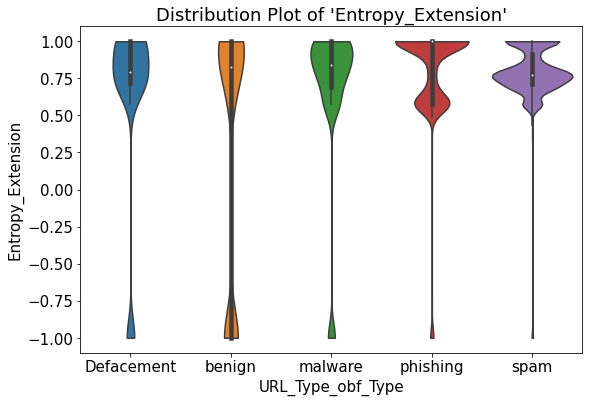

Entropy_Afterpath


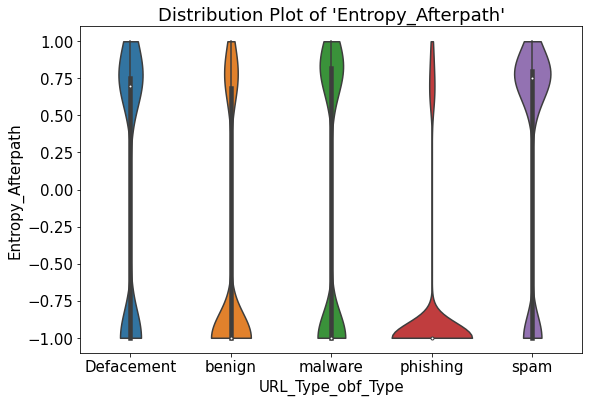

In [13]:
for feature in features:
    print(feature)

    order = df[dep_var].unique()

    fig = plt.figure()
    fig.set_size_inches(9, 6)
    plt.rcParams.update({'font.size':15})

    sns.violinplot(x=dep_var, y=feature, data=df, order=order, cut=0)

    plt.title('Distribution Plot of \'{}\''.format(feature))
    
    plt.show()


feature: sub-Directory_LongestWordLength (0, 0)
feature: dld_domain (0, 1)
feature: Path_LongestWordLength (1, 0)
feature: Entropy_URL (1, 1)


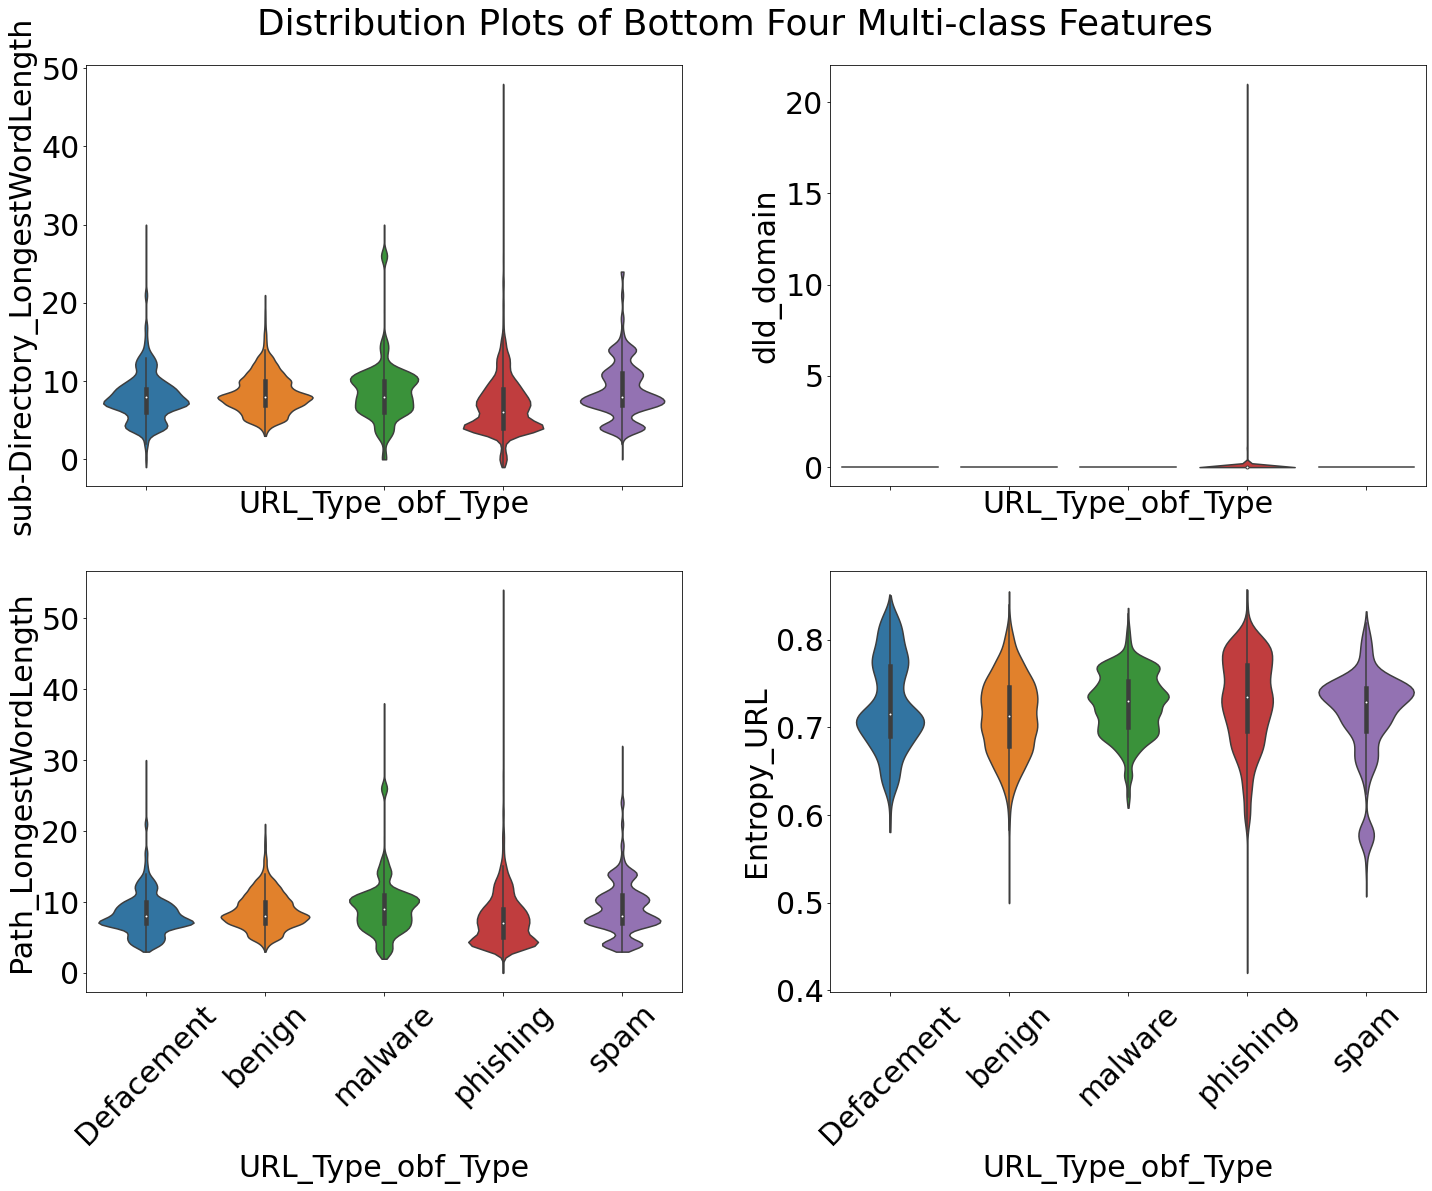

In [12]:

# Add specific features to a subplot for ease of use
feature_list = ['Entropy_URL', 'Path_LongestWordLength', 'dld_domain',
       'sub-Directory_LongestWordLength']

nrows=2
ncols=2
plt.rcParams.update({'font.size':30})
fig,axes= plt.subplots(nrows=nrows, ncols=ncols, sharex='col')
fig.set_size_inches(24,16)
fig.subplots_adjust(top=0.93)

legend=False

for i in range(nrows):
    for j in range(ncols):
        feature = feature_list.pop()
        print('feature: {} ({}, {})'.format(feature, i, j))
        
        axes[i][j].ticklabel_format(style='sci', axis='y')
        
        #data, order = get_df(feature=feature, dep_var='class')
        #sns.violinplot(x=dep_var, y=feature, data=df, order=order, scale='width', palette='muted', cut=0, scale_hue=True, bw=2.0, ax=axes[i][j])
        sns.violinplot(x=dep_var, y=feature, data=df, order=order, cut=0, ax=axes[i][j])

        axes[i][j].set_title('')
        axes[i][j].set_ylabel(feature)
        
        for tick in axes[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.subplots_adjust(wspace=0.25)
plt.suptitle('Distribution Plots of Bottom Four Multi-class Features')
#plt.xticks(rotation=45)
#fig.tight_layout()
plt.show()


feature: Entropy_Afterpath (0, 0)
feature: argPathRatio (0, 1)
feature: NumberRate_AfterPath (1, 0)
feature: NumberRate_Domain (1, 1)


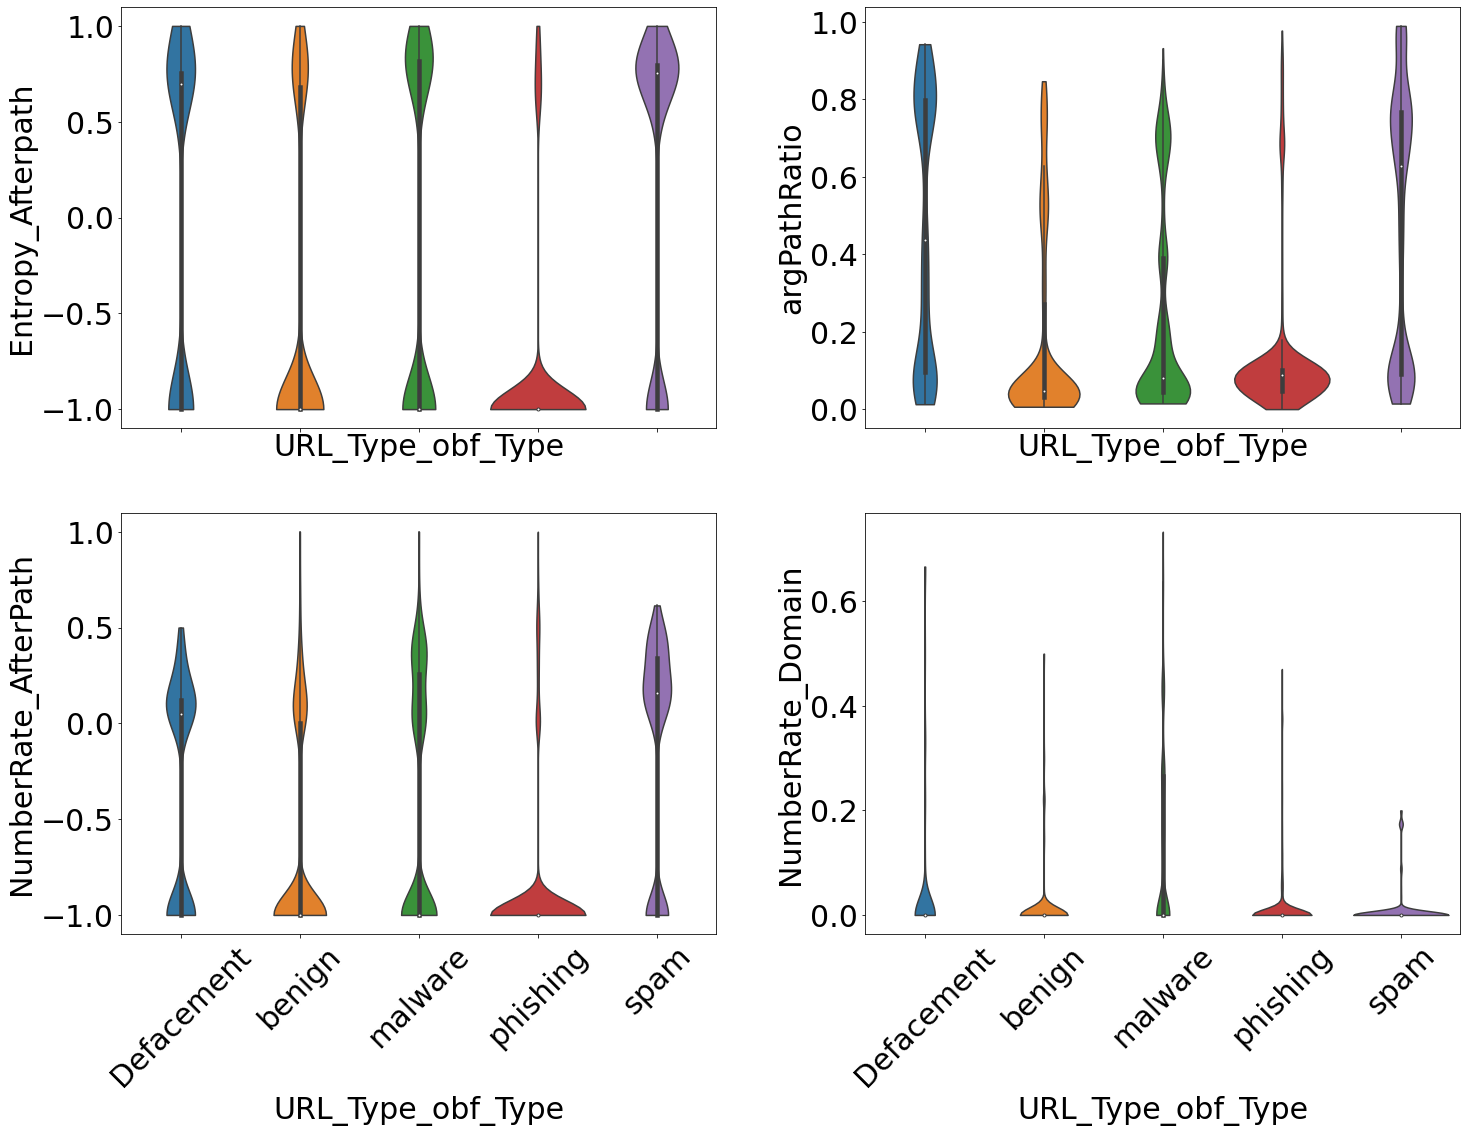

In [13]:
# Add specific features to a subplot for ease of use
feature_list = ['NumberRate_Domain', 'NumberRate_AfterPath',
       'argPathRatio', 'Entropy_Afterpath']

nrows=2
ncols=2
plt.rcParams.update({'font.size':30})
fig,axes= plt.subplots(nrows=nrows, ncols=ncols, sharex='col')
fig.set_size_inches(24,16)
fig.subplots_adjust(top=0.93)

legend=False

for i in range(nrows):
    for j in range(ncols):
        feature = feature_list.pop()
        print('feature: {} ({}, {})'.format(feature, i, j))
        
        axes[i][j].ticklabel_format(style='sci', axis='y')
        
        #data, order = get_df(feature=feature, dep_var='class')
        #sns.violinplot(x=dep_var, y=feature, data=df, order=order, scale='width', palette='muted', cut=0, scale_hue=True, bw=2.0, ax=axes[i][j])
        sns.violinplot(x=dep_var, y=feature, data=df, order=order, cut=0, ax=axes[i][j])

        axes[i][j].set_title('')
        axes[i][j].set_ylabel(feature)
        
        for tick in axes[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.subplots_adjust(wspace=0.25)
#plt.suptitle('Distribution Plots of Top Four Multi-class Features')
#plt.xticks(rotation=45)
#fig.tight_layout()
plt.show()


In [14]:

df[dep_var] = df[dep_var].map(lambda val: val if val == 'benign' else 'malicious')
df[dep_var].value_counts()


malicious    16273
benign        2709
Name: URL_Type_obf_Type, dtype: int64

Querylength


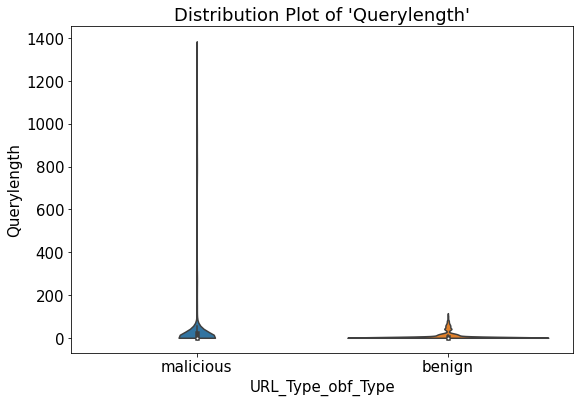

domain_token_count


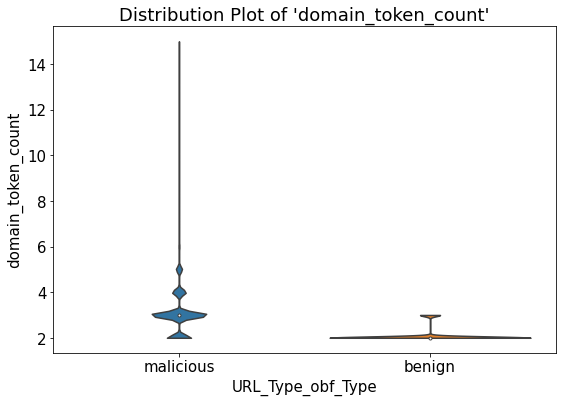

path_token_count


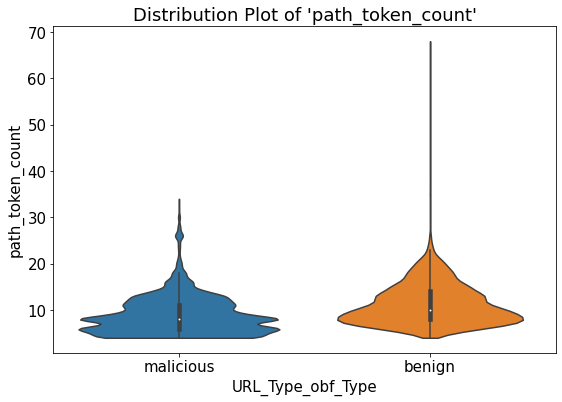

avgdomaintokenlen


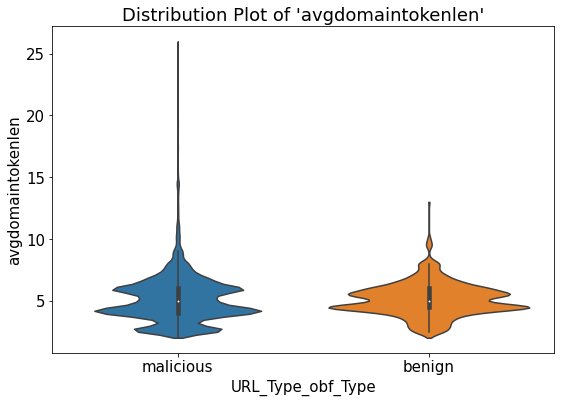

longdomaintokenlen


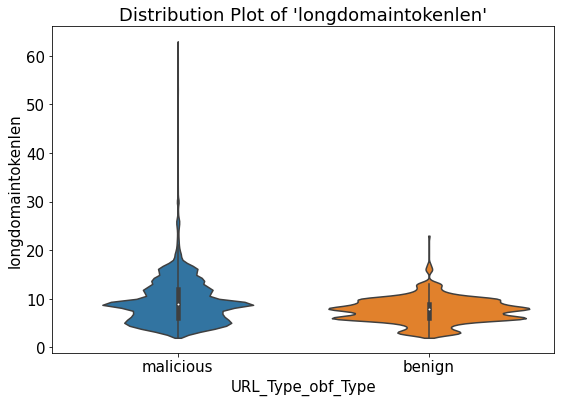

avgpathtokenlen


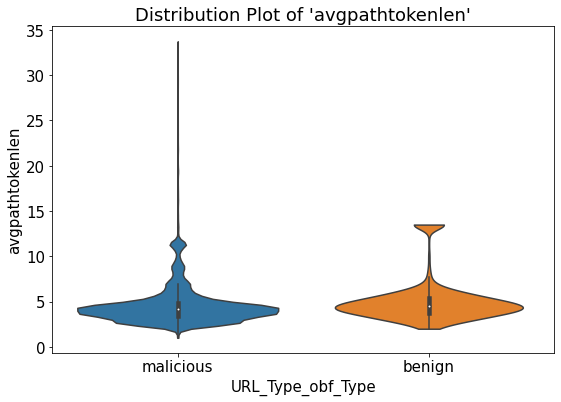

tld


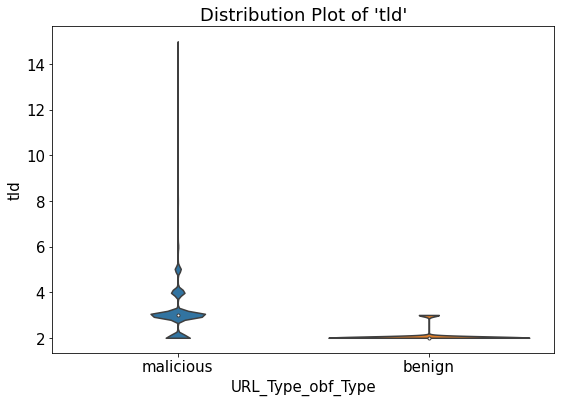

charcompvowels


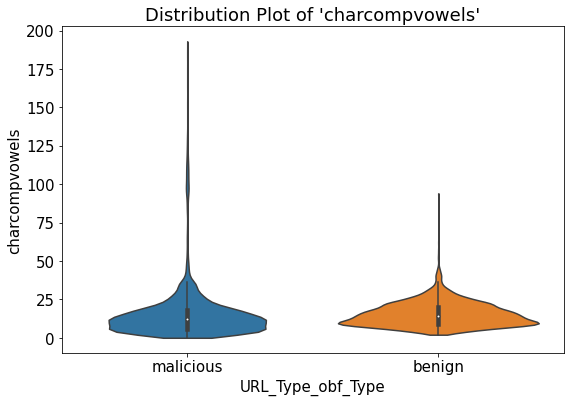

charcompace


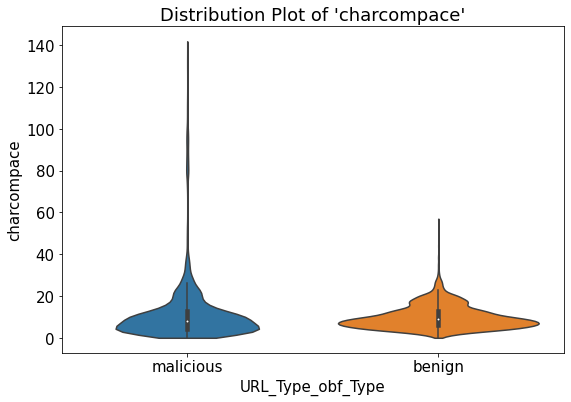

ldl_url


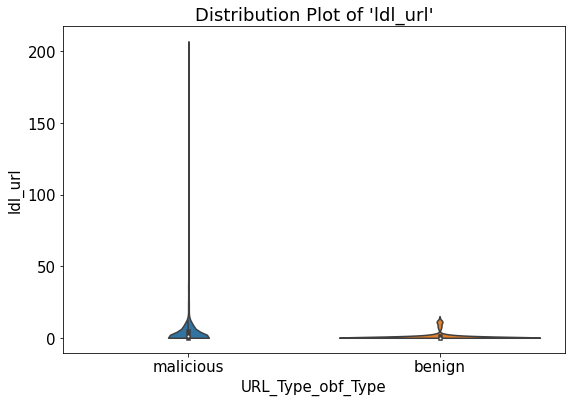

ldl_domain


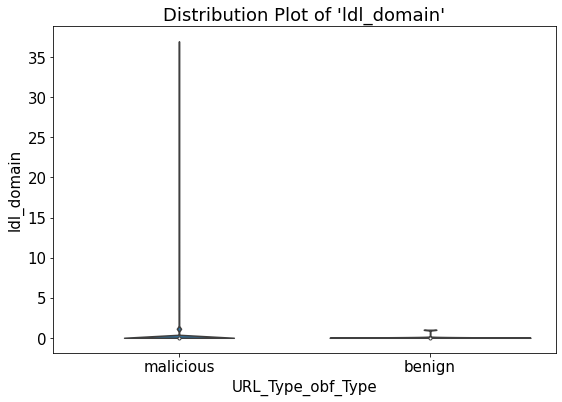

ldl_path


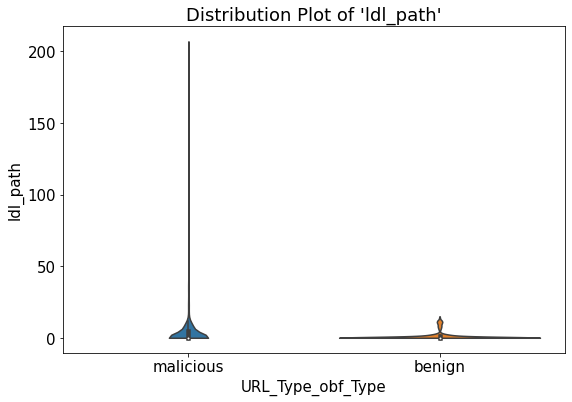

ldl_filename


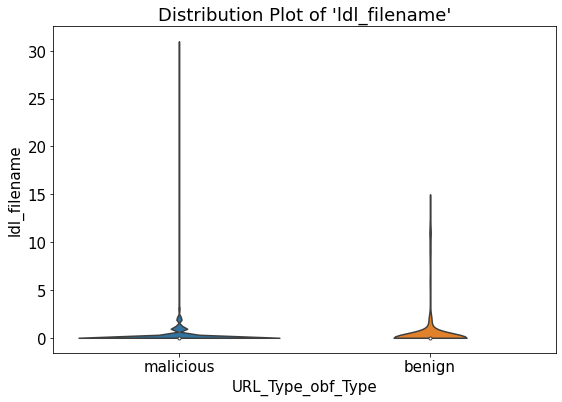

ldl_getArg


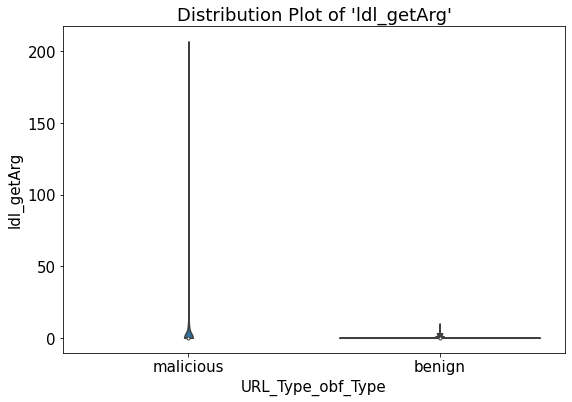

dld_url


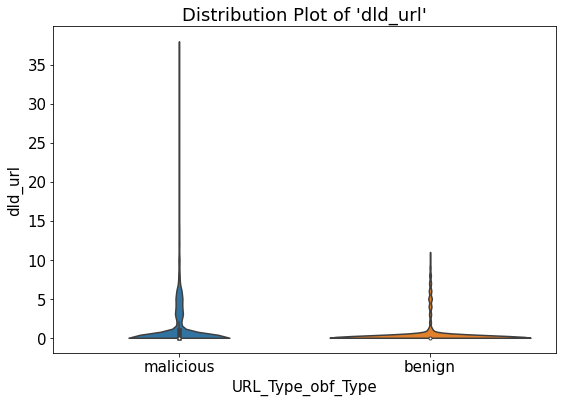

dld_domain


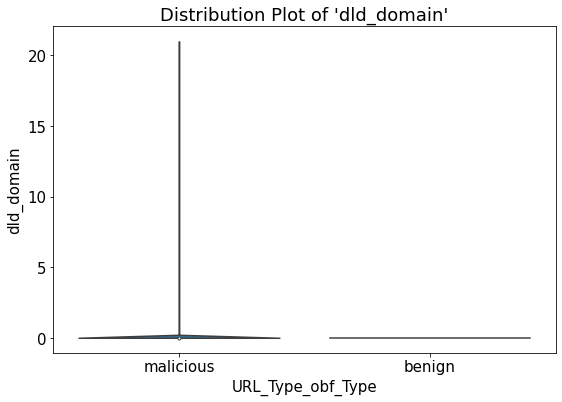

dld_path


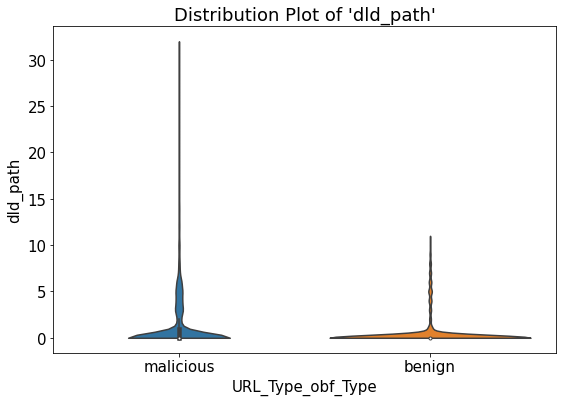

dld_filename


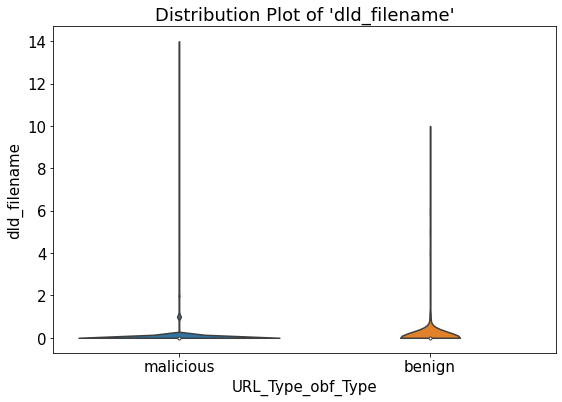

dld_getArg


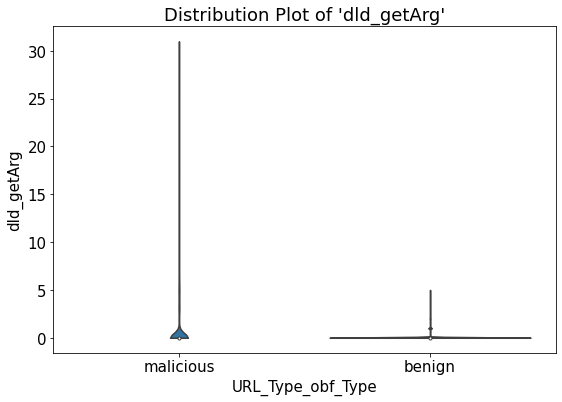

urlLen


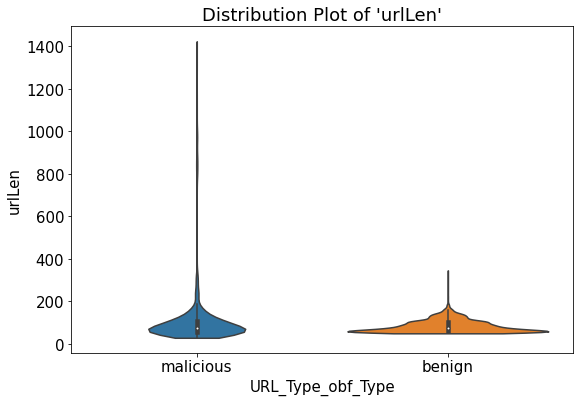

domainlength


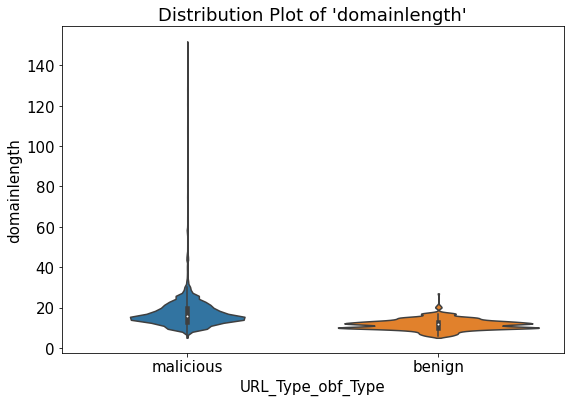

pathLength


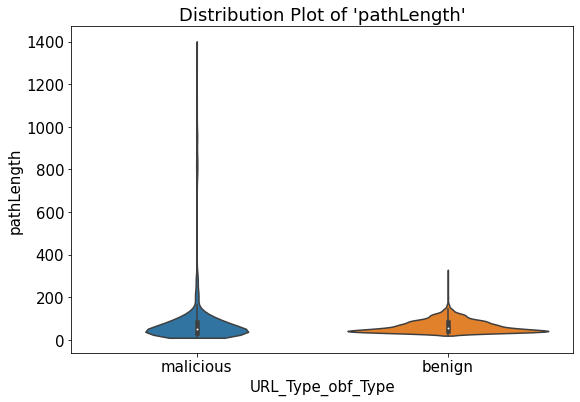

subDirLen


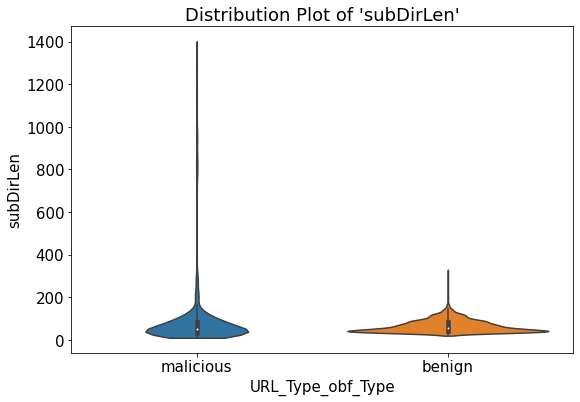

fileNameLen


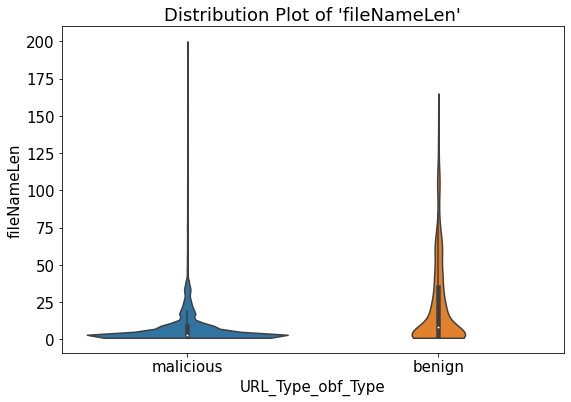

this.fileExtLen


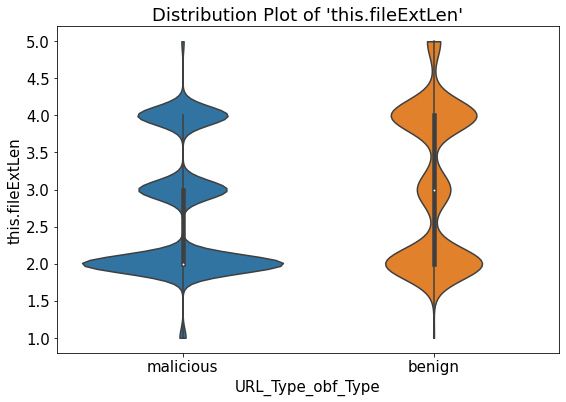

ArgLen


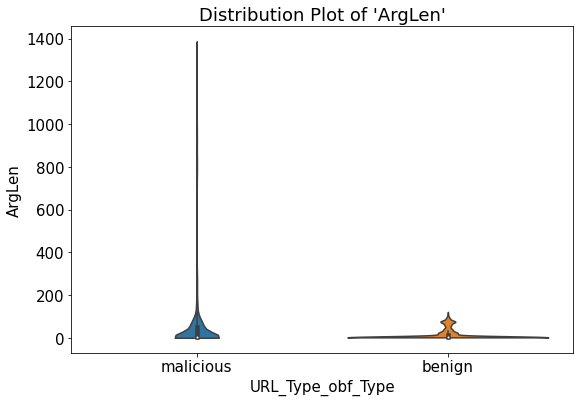

pathurlRatio


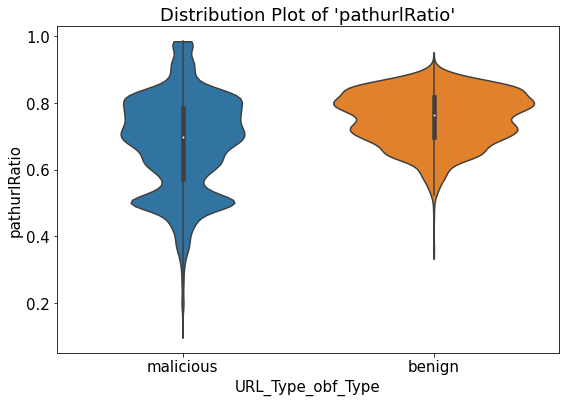

ArgUrlRatio


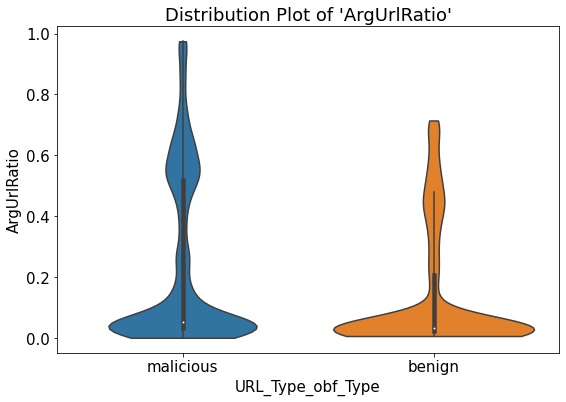

argDomanRatio


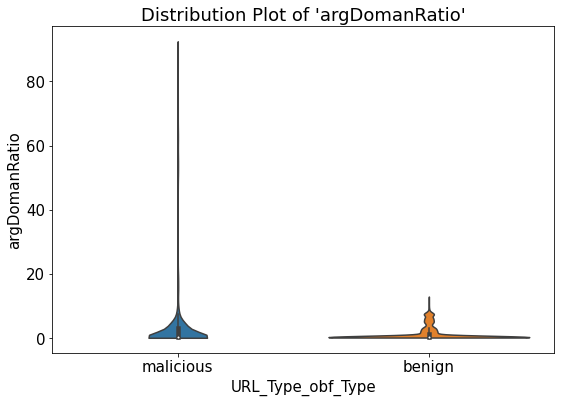

domainUrlRatio


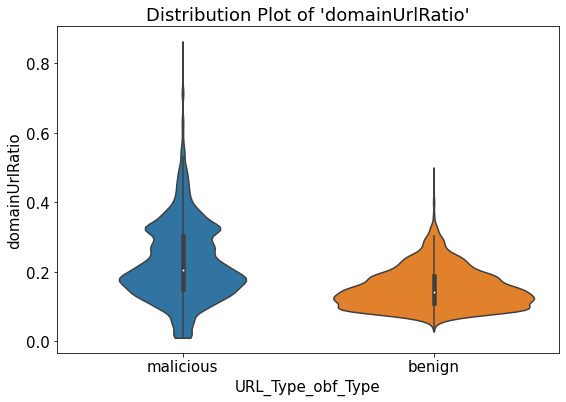

pathDomainRatio


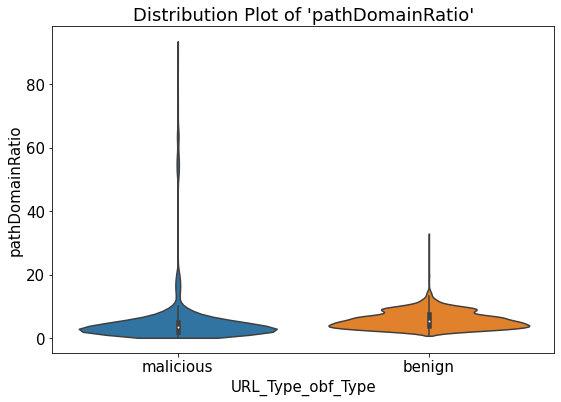

argPathRatio


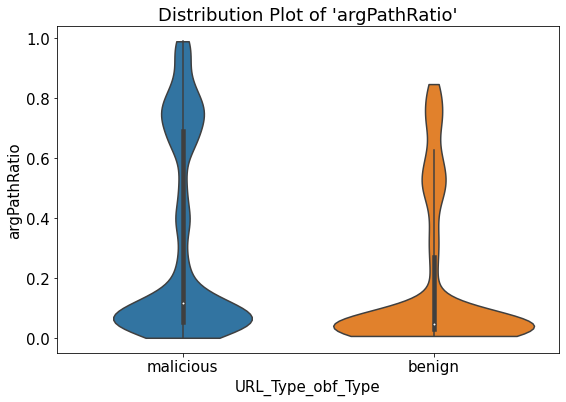

executable


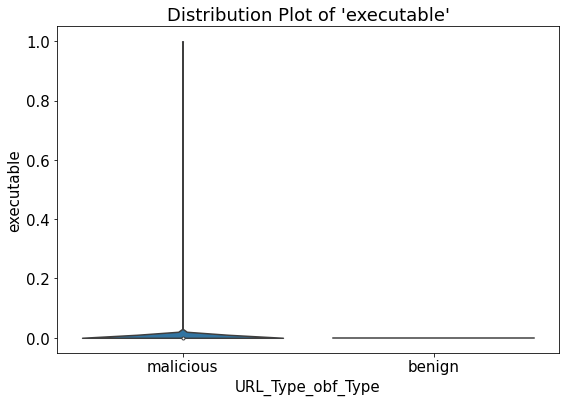

isPortEighty


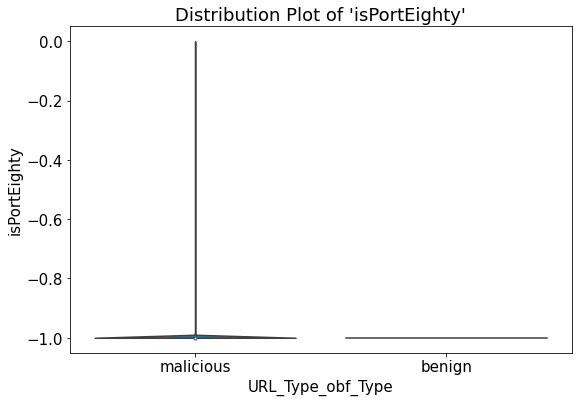

NumberofDotsinURL


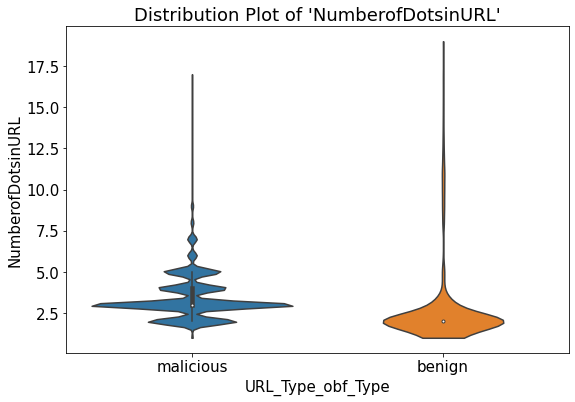

ISIpAddressInDomainName


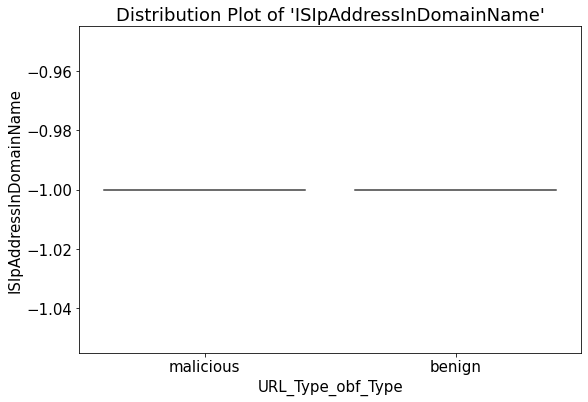

CharacterContinuityRate


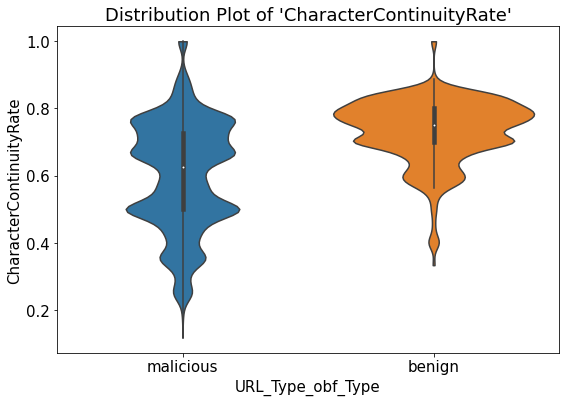

LongestVariableValue


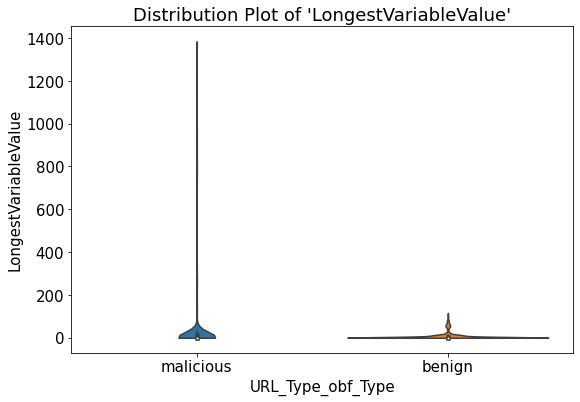

URL_DigitCount


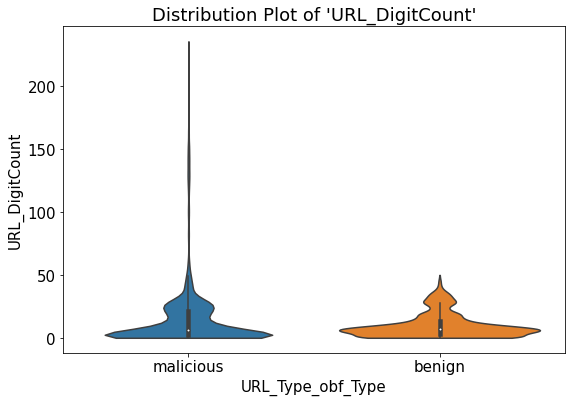

host_DigitCount


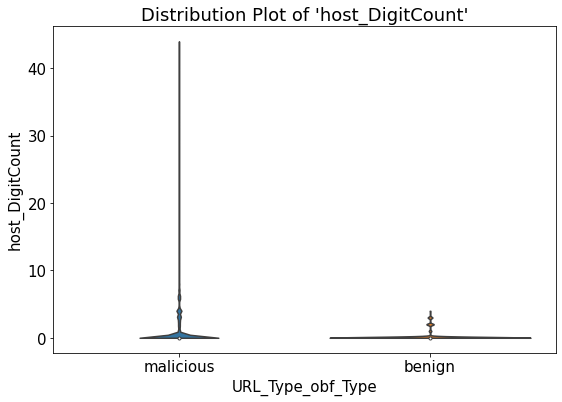

Directory_DigitCount


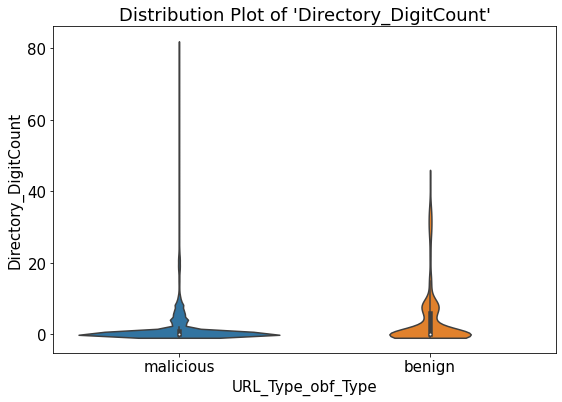

File_name_DigitCount


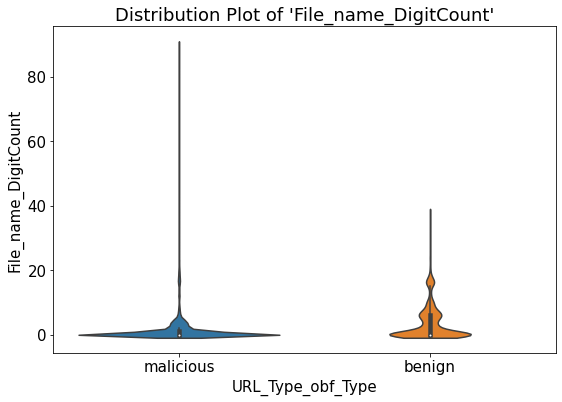

Extension_DigitCount


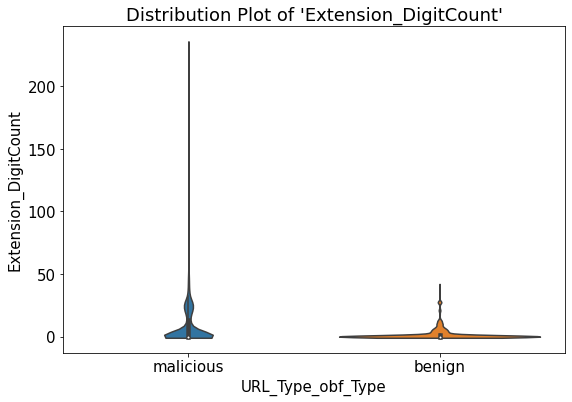

Query_DigitCount


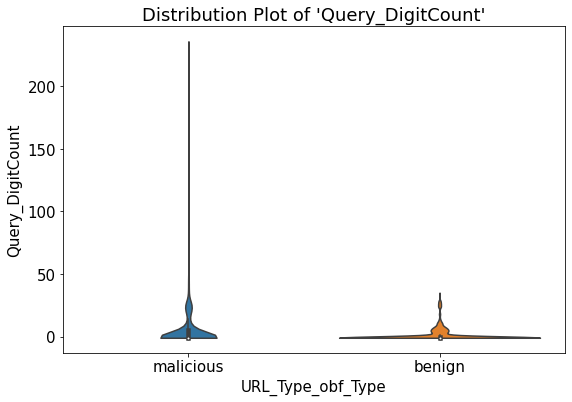

URL_Letter_Count


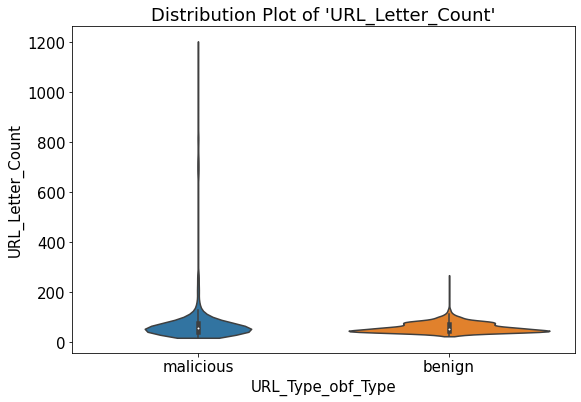

host_letter_count


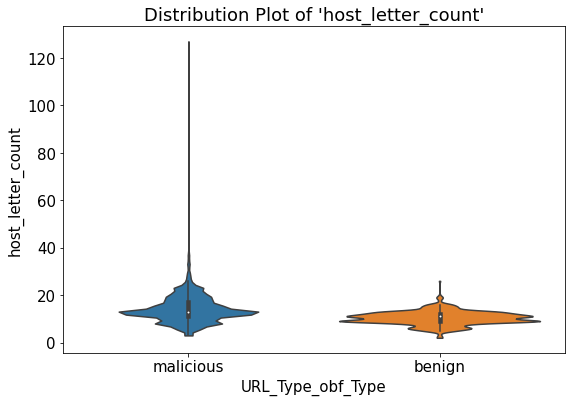

Directory_LetterCount


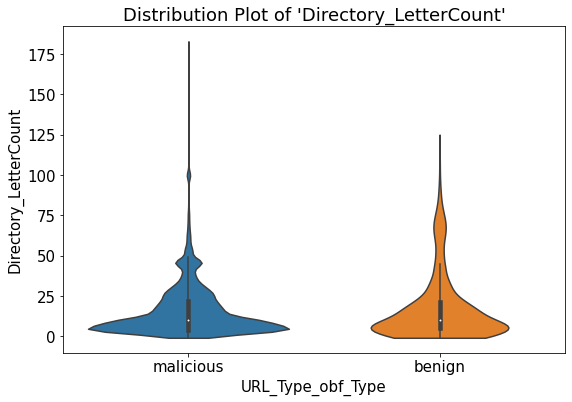

Filename_LetterCount


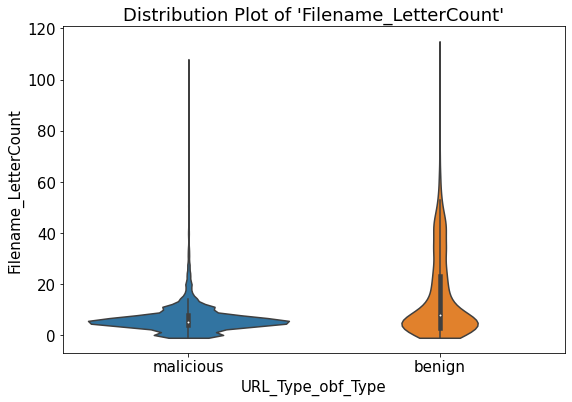

Extension_LetterCount


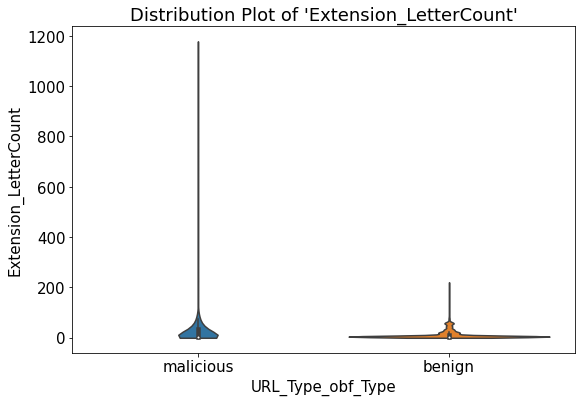

Query_LetterCount


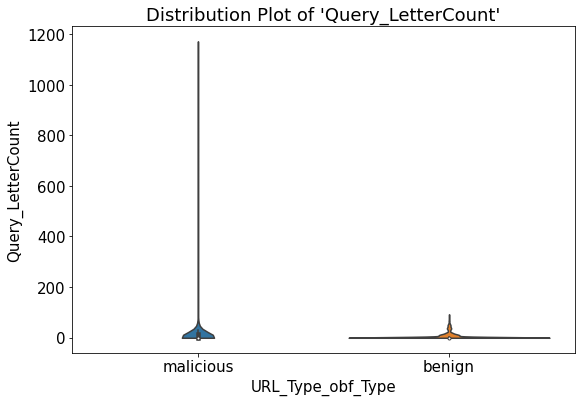

LongestPathTokenLength


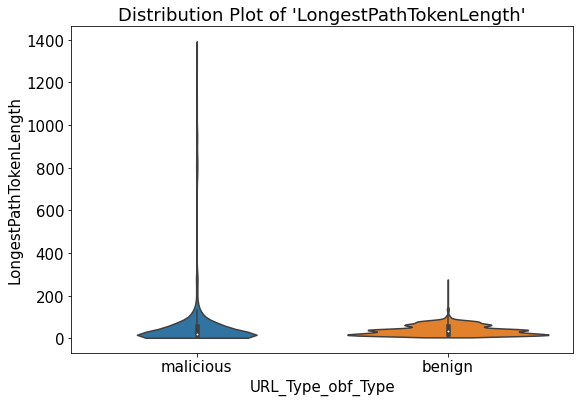

Domain_LongestWordLength


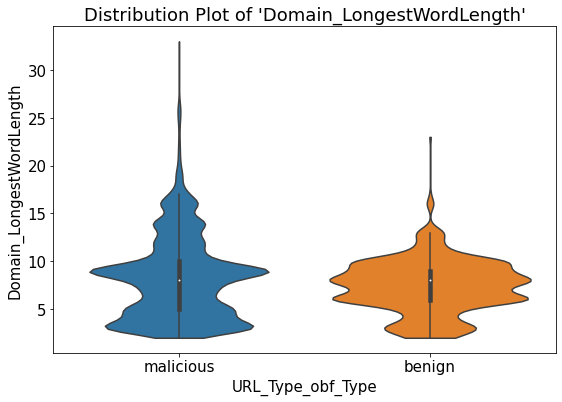

Path_LongestWordLength


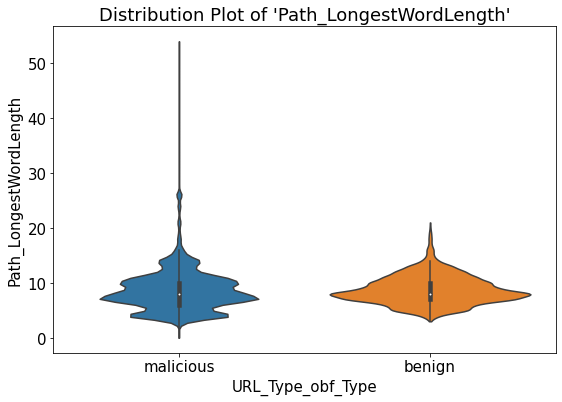

sub-Directory_LongestWordLength


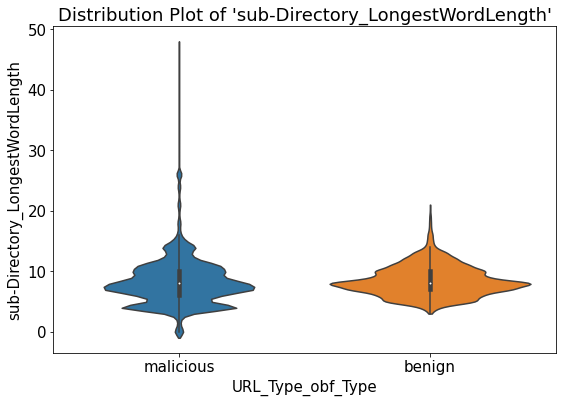

Arguments_LongestWordLength


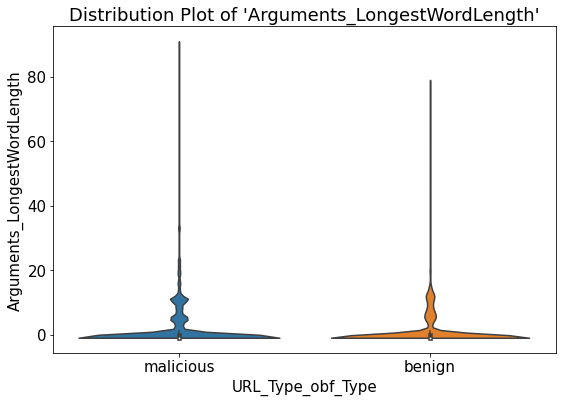

URL_sensitiveWord


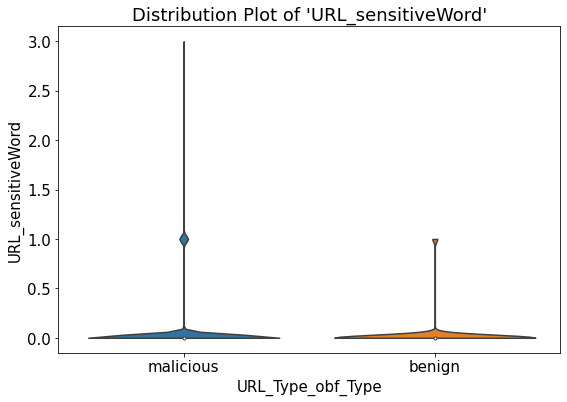

URLQueries_variable


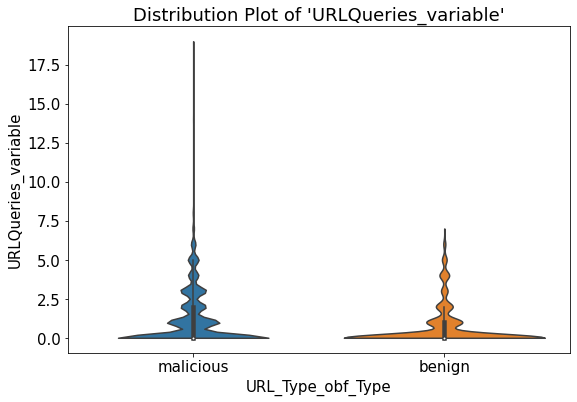

spcharUrl


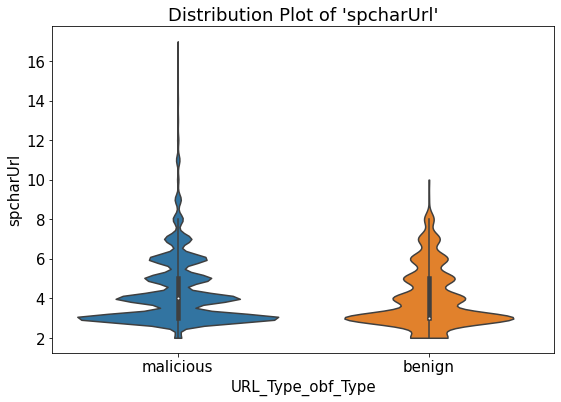

delimeter_Domain


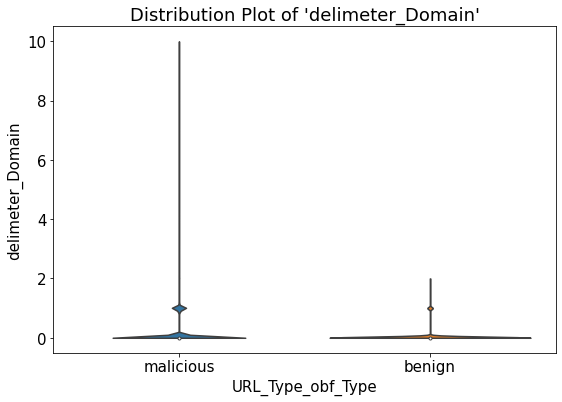

delimeter_path


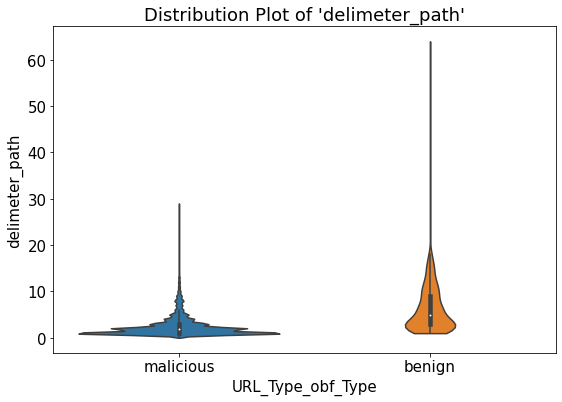

delimeter_Count


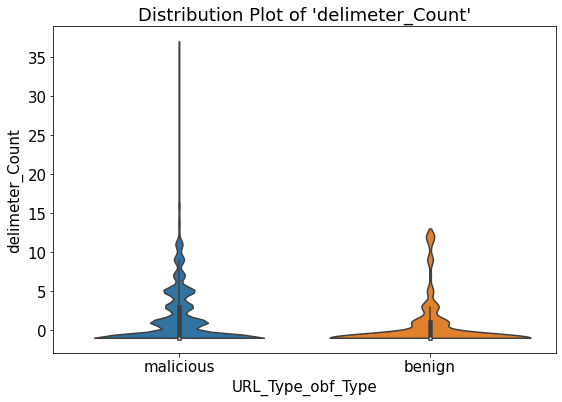

NumberRate_URL


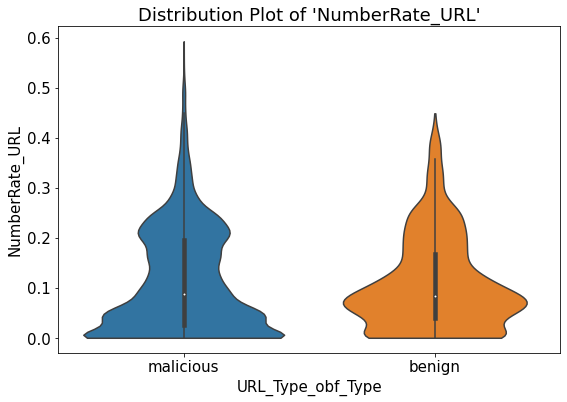

NumberRate_Domain


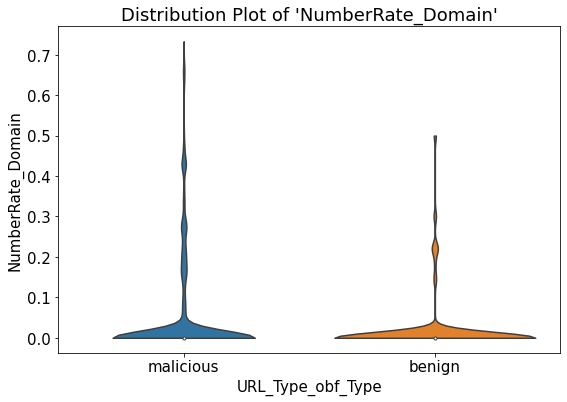

NumberRate_DirectoryName


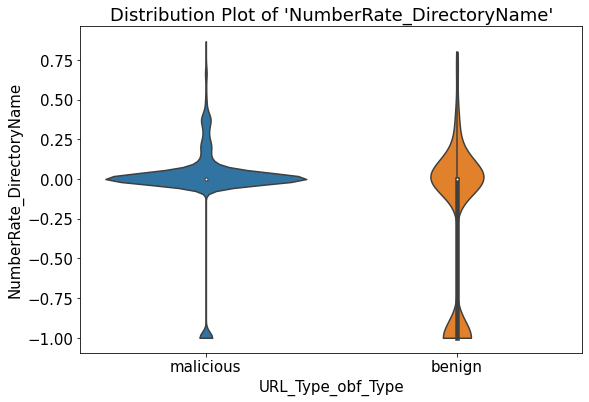

NumberRate_FileName


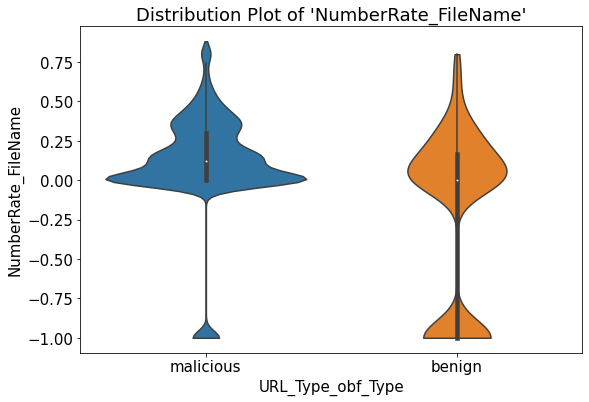

NumberRate_Extension


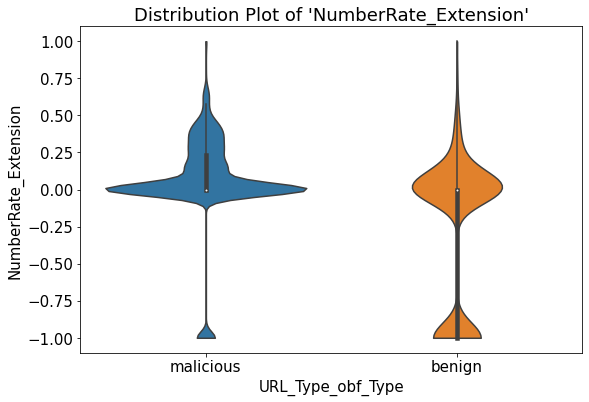

NumberRate_AfterPath


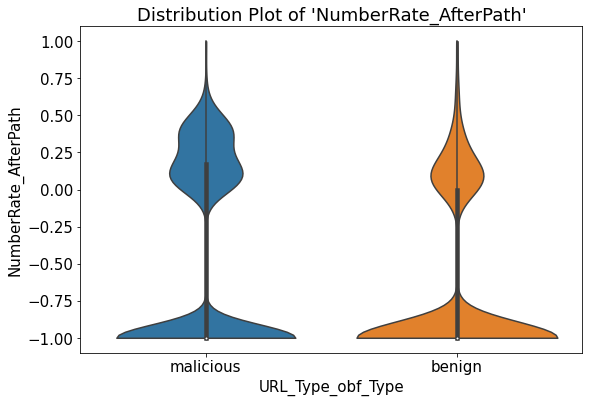

SymbolCount_URL


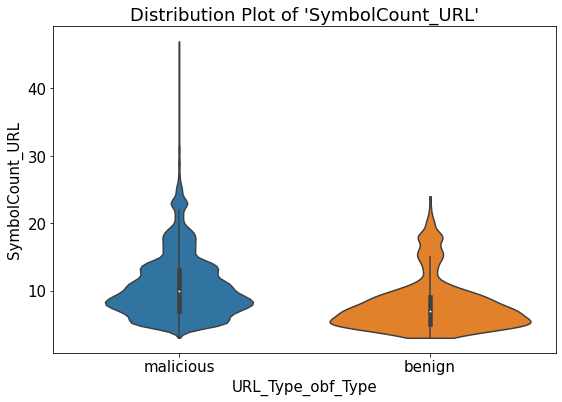

SymbolCount_Domain


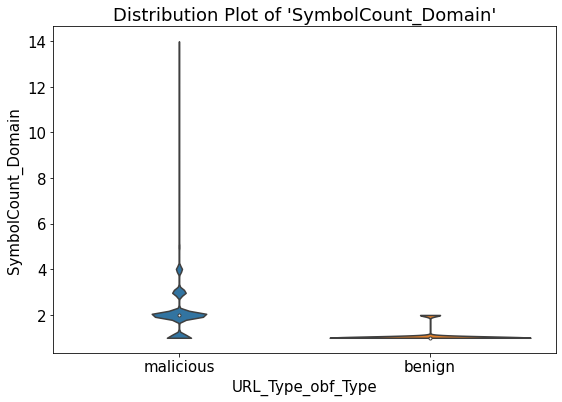

SymbolCount_Directoryname


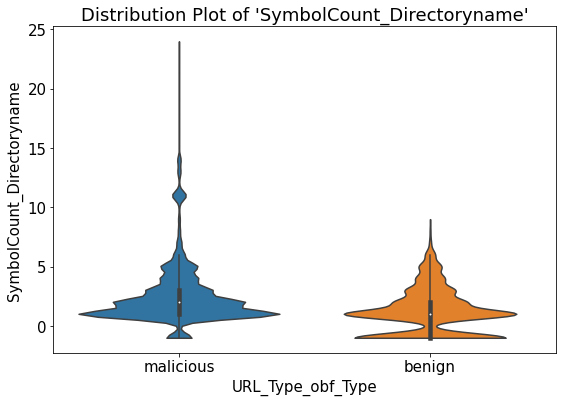

SymbolCount_FileName


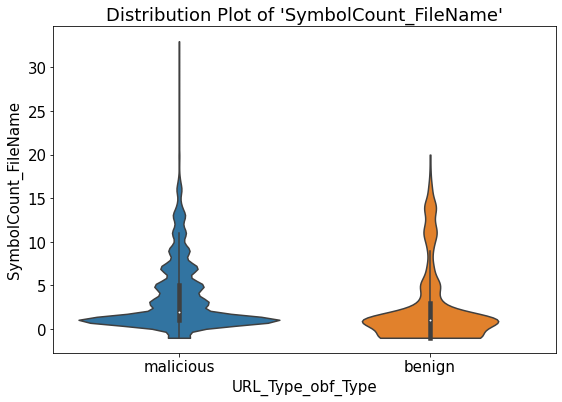

SymbolCount_Extension


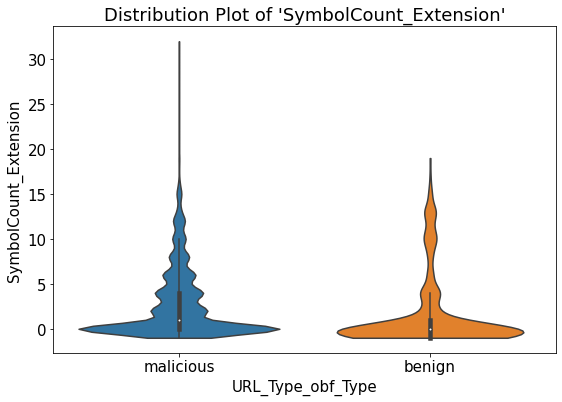

SymbolCount_Afterpath


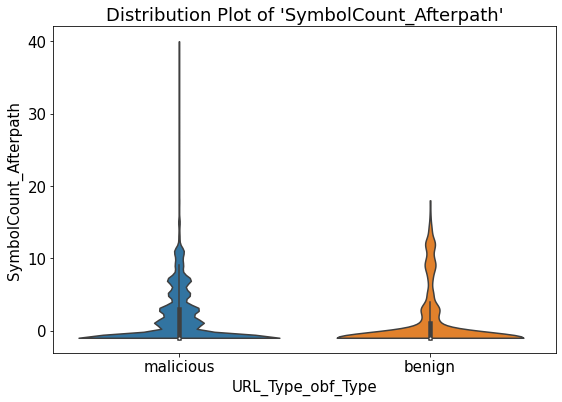

Entropy_URL


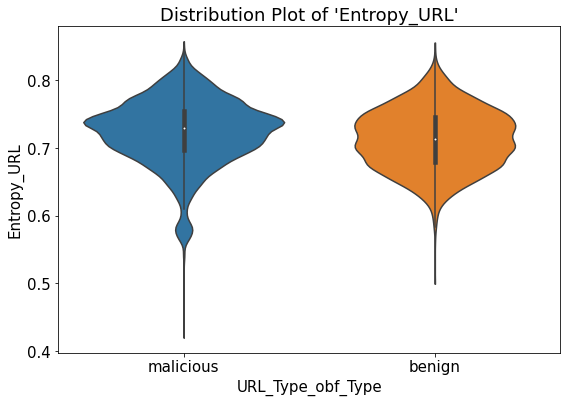

Entropy_Domain


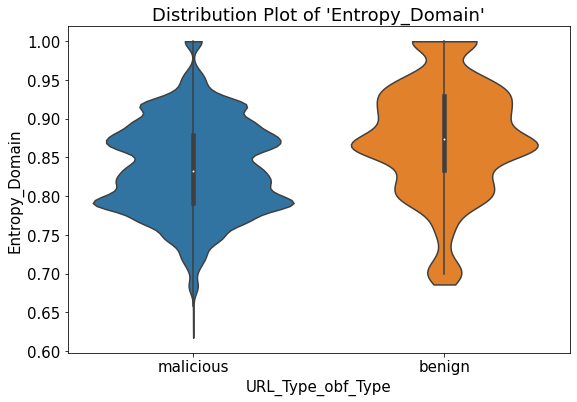

Entropy_DirectoryName


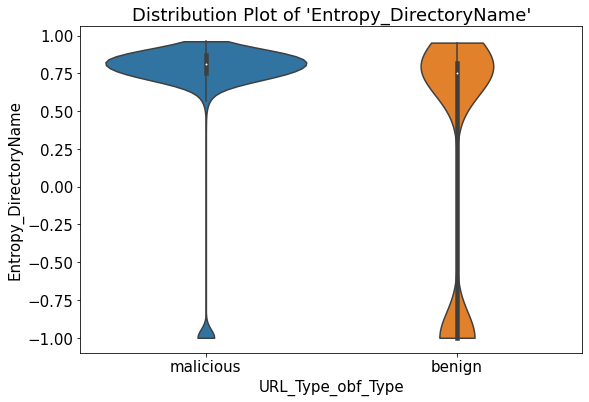

Entropy_Filename


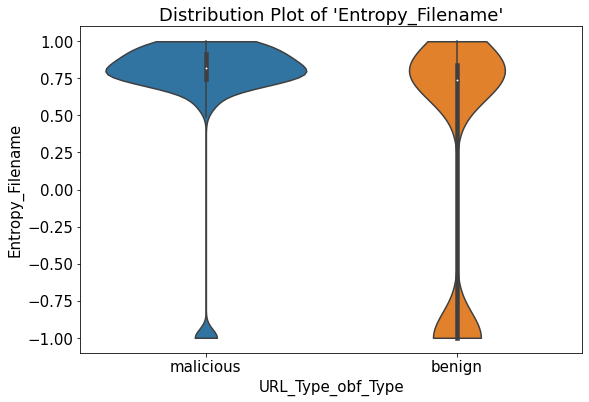

Entropy_Extension


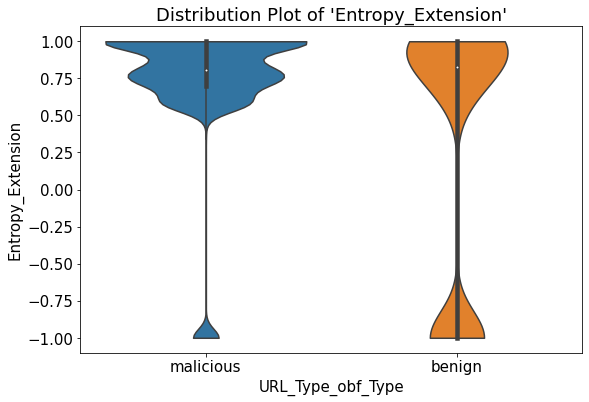

Entropy_Afterpath


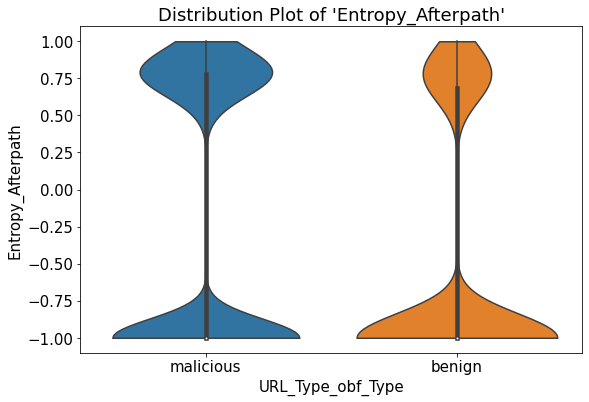

In [15]:
for feature in features:
    print(feature)

    order = df[dep_var].unique()

    fig = plt.figure()
    fig.set_size_inches(9, 6)
    plt.rcParams.update({'font.size':15})

    sns.violinplot(x=dep_var, y=feature, data=df, order=order, cut=0)

    plt.title('Distribution Plot of \'{}\''.format(feature))
    
    plt.show()


feature: sub-Directory_LongestWordLength (0, 0)
feature: Path_LongestWordLength (0, 1)
feature: charcompvowels (1, 0)
feature: avgdomaintokenlen (1, 1)


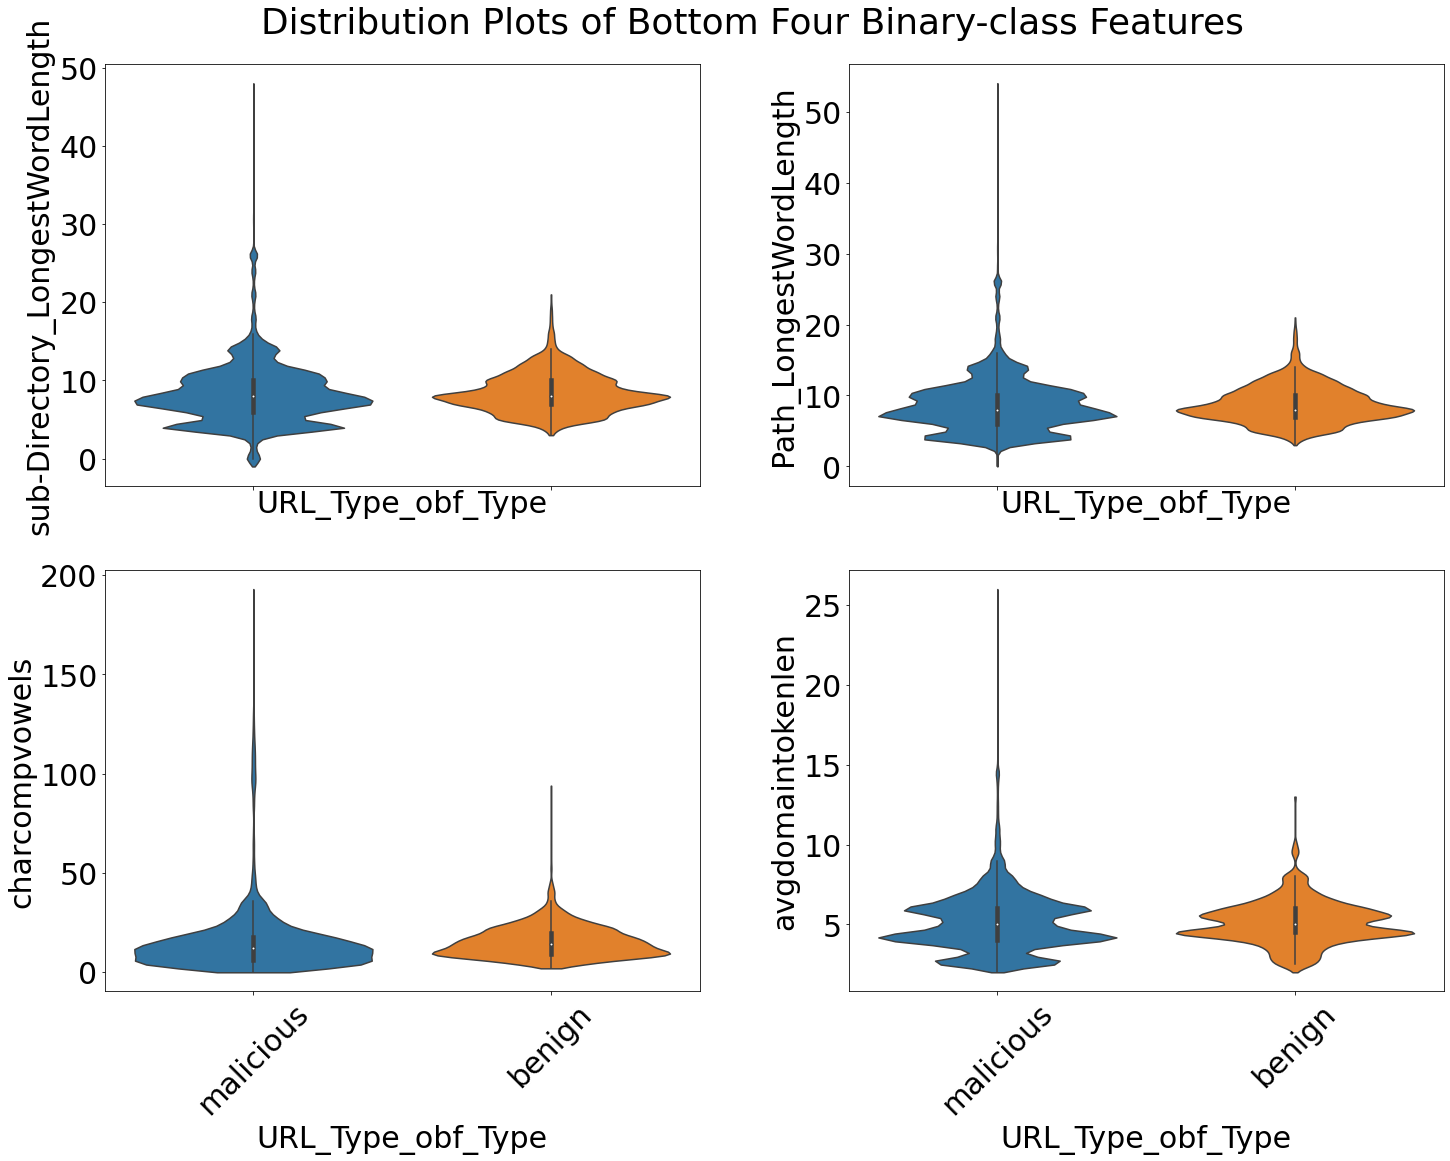

In [16]:
# Add specific features to a subplot for ease of use
feature_list = ['avgdomaintokenlen', 'charcompvowels', 'Path_LongestWordLength',
       'sub-Directory_LongestWordLength']

nrows=2
ncols=2
plt.rcParams.update({'font.size':30})
fig,axes= plt.subplots(nrows=nrows, ncols=ncols, sharex='col')
fig.set_size_inches(24,16)
fig.subplots_adjust(top=0.93)

legend=False

for i in range(nrows):
    for j in range(ncols):
        feature = feature_list.pop()
        print('feature: {} ({}, {})'.format(feature, i, j))
        
        axes[i][j].ticklabel_format(style='sci', axis='y')
        
        #data, order = get_df(feature=feature, dep_var='class')
        #sns.violinplot(x=dep_var, y=feature, data=df, order=order, scale='width', palette='muted', cut=0, scale_hue=True, bw=2.0, ax=axes[i][j])
        sns.violinplot(x=dep_var, y=feature, data=df, order=order, scale='width', cut=0, ax=axes[i][j])

        axes[i][j].set_title('')
        axes[i][j].set_ylabel(feature)
        
        for tick in axes[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.subplots_adjust(wspace=0.25)
plt.suptitle('Distribution Plots of Bottom Four Binary-class Features')
#fig.tight_layout()
plt.show()


feature: fileNameLen (0, 0)
feature: domain_token_count (0, 1)
feature: tld (1, 0)
feature: SymbolCount_Domain (1, 1)


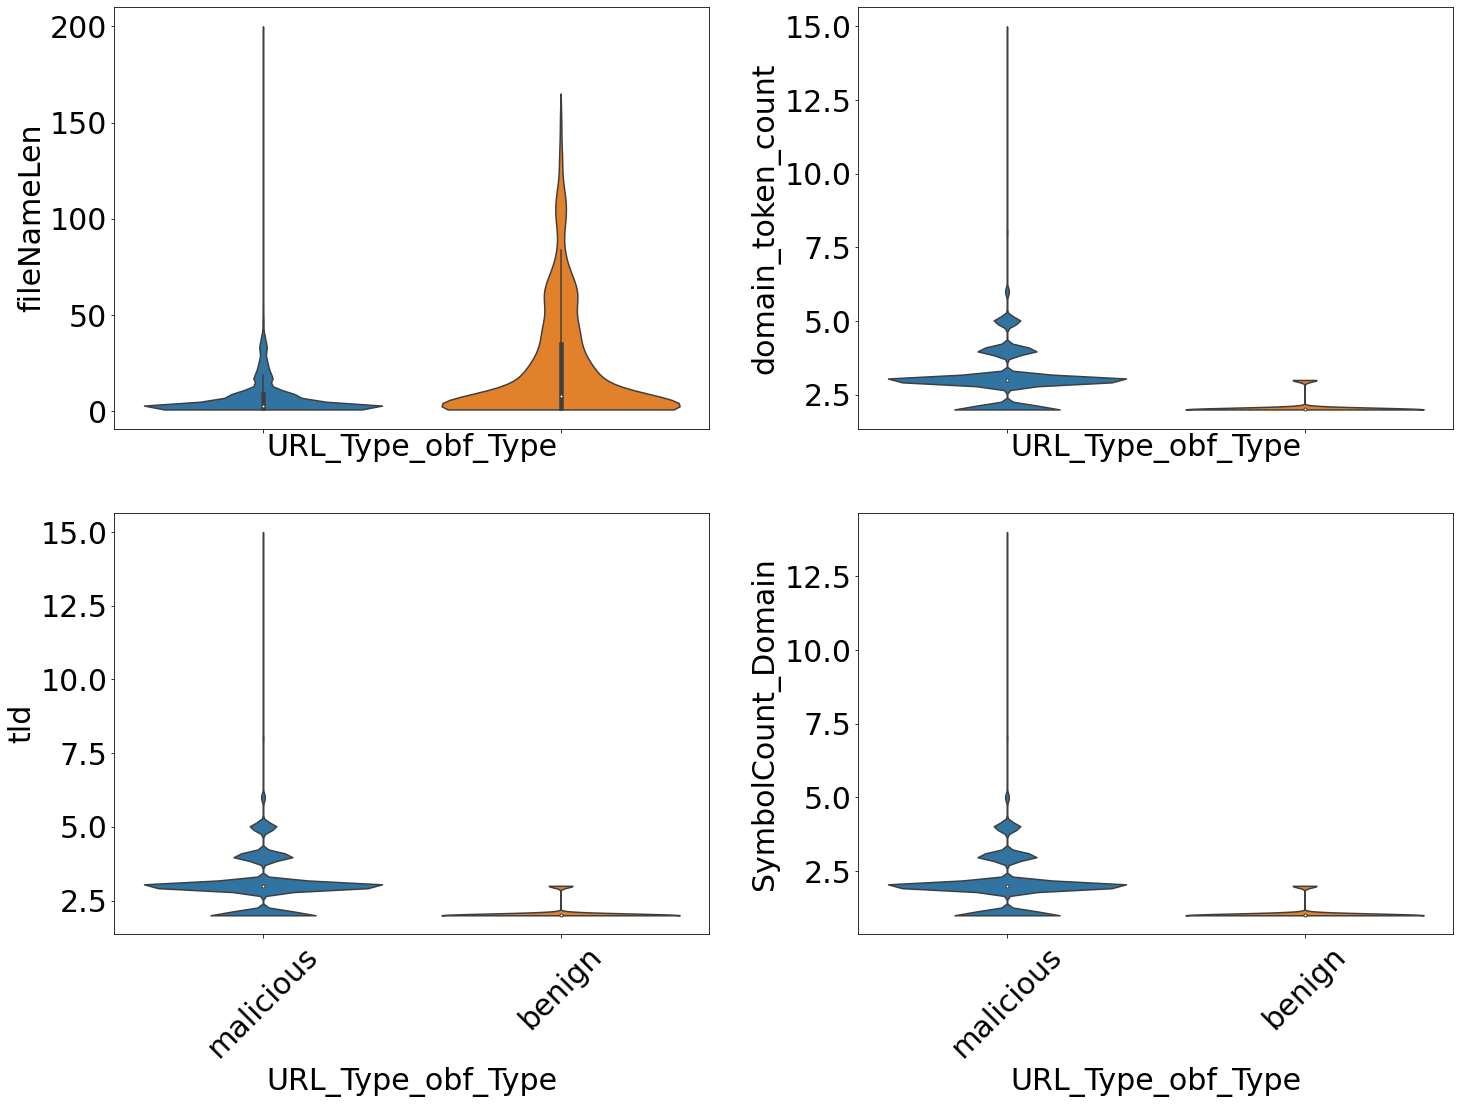

In [17]:

# Add specific features to a subplot for ease of use
feature_list = ['SymbolCount_Domain', 'tld',
       'domain_token_count', 'fileNameLen']

nrows=2
ncols=2
plt.rcParams.update({'font.size':30})
fig,axes= plt.subplots(nrows=nrows, ncols=ncols, sharex='col')
fig.set_size_inches(24,16)
fig.subplots_adjust(top=0.93)

legend=False

for i in range(nrows):
    for j in range(ncols):
        feature = feature_list.pop()
        print('feature: {} ({}, {})'.format(feature, i, j))
        
        axes[i][j].ticklabel_format(style='sci', axis='y')
        
        #data, order = get_df(feature=feature, dep_var='class')
        #sns.violinplot(x=dep_var, y=feature, data=df, order=order, scale='width', palette='muted', cut=0, scale_hue=True, bw=2.0, ax=axes[i][j])
        sns.violinplot(x=dep_var, y=feature, data=df, order=order, scale='width', cut=0, ax=axes[i][j])

        axes[i][j].set_title('')
        axes[i][j].set_ylabel(feature)
        
        for tick in axes[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.subplots_adjust(wspace=0.25)
#plt.suptitle('Distribution Plots of Top Four Binary-class Features')
#fig.tight_layout()
plt.show()
